# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [4]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    

    """
    Y_positive_train=np.array(np.where(Y_train==1))
    Y_negative_train=np.array(np.where(Y_train==-1))
    a=Y_positive_train.shape[1]/(Y_positive_train.shape[1]+Y_negative_train.shape[1])
    mu_positive=np.array([np.mean(X_train[np.where(Y_train==1),0]),np.mean(X_train[np.where(Y_train==1),1])])
    mu_negative=np.array([np.mean(X_train[np.where(Y_train==-1),0]),np.mean(X_train[np.where(Y_train==-1),1])])
    def eta(x):
        return 1/(1+((1-a)/a)*np.exp(-(np.matmul((mu_positive-mu_negative).T,x)+0.5*sum(np.square(mu_negative))-0.5*sum(np.square(mu_positive)))))
    etas=[2*eta(x) for x in X_test]
    Y_test_pred=np.sign(etas-np.ones(X_test.shape[0]))
    return Y_test_pred
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    Y_positive_train=np.array(np.where(Y_train==1))
    Y_negative_train=np.array(np.where(Y_train==-1))
    a=Y_positive_train.shape[1]/(Y_positive_train.shape[1]+Y_negative_train.shape[1])
    mu_positive=np.array([np.mean(X_train[np.where(Y_train==1),0]),np.mean(X_train[np.where(Y_train==1),1])])
    mu_negative=np.array([np.mean(X_train[np.where(Y_train==-1),0]),np.mean(X_train[np.where(Y_train==-1),1])])
    co_variance=np.cov(X_train,rowvar=False)
    def eta(x):
        return (a*(np.exp(-0.5*np.matmul(np.matmul((x-mu_positive).T,np.linalg.inv(co_variance)),(x-mu_positive)))))/((a*(np.exp(-0.5*np.matmul(np.matmul((x-mu_positive).T,np.linalg.inv(co_variance)),(x-mu_positive)))))+(1-a)*(np.exp(-0.5*np.matmul(np.matmul((x-mu_negative).T,np.linalg.inv(co_variance)),(x-mu_negative)))))
    etas=[2*eta(x) for x in X_test]
    Y_test_pred=np.sign(etas-np.ones(X_test.shape[0]))
    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    Y_positive_train=np.array(np.where(Y_train==1))
    Y_negative_train=np.array(np.where(Y_train==-1))
    a=Y_positive_train.shape[1]/(Y_positive_train.shape[1]+Y_negative_train.shape[1])
    mu_positive=np.array([np.mean(X_train[np.where(Y_train==1),0]),np.mean(X_train[np.where(Y_train==1),1])])
    mu_negative=np.array([np.mean(X_train[np.where(Y_train==-1),0]),np.mean(X_train[np.where(Y_train==-1),1])])
    co_variance_positive=np.cov(X_train[np.where(Y_train==1)],rowvar=False)
    co_variance_negative=np.cov(X_train[np.where(Y_train==-1)],rowvar=False)
    def eta(x):
        return ((a/((np.linalg.det(co_variance_positive))**(0.5)))*(np.exp(-0.5*np.matmul(np.matmul((x-mu_positive).T,np.linalg.inv(co_variance_positive)),(x-mu_positive)))))/(((a/((np.linalg.det(co_variance_positive))**0.5))*(np.exp(-0.5*np.matmul(np.matmul((x-mu_positive).T,np.linalg.inv(co_variance_positive)),(x-mu_positive)))))+((1-a)/((np.linalg.det(co_variance_negative))**0.5))*(np.exp(-0.5*np.matmul(np.matmul((x-mu_negative).T,np.linalg.inv(co_variance_negative)),(x-mu_negative)))))
    etas=[2*eta(x) for x in X_test]
    Y_test_pred=np.sign(etas-np.ones(X_test.shape[0]))
    return Y_test_pred





In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
print(np.cov(X_train_pos,rowvar=False))
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)



[[1.02376482 0.02102103]
 [0.02102103 0.98563512]]


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


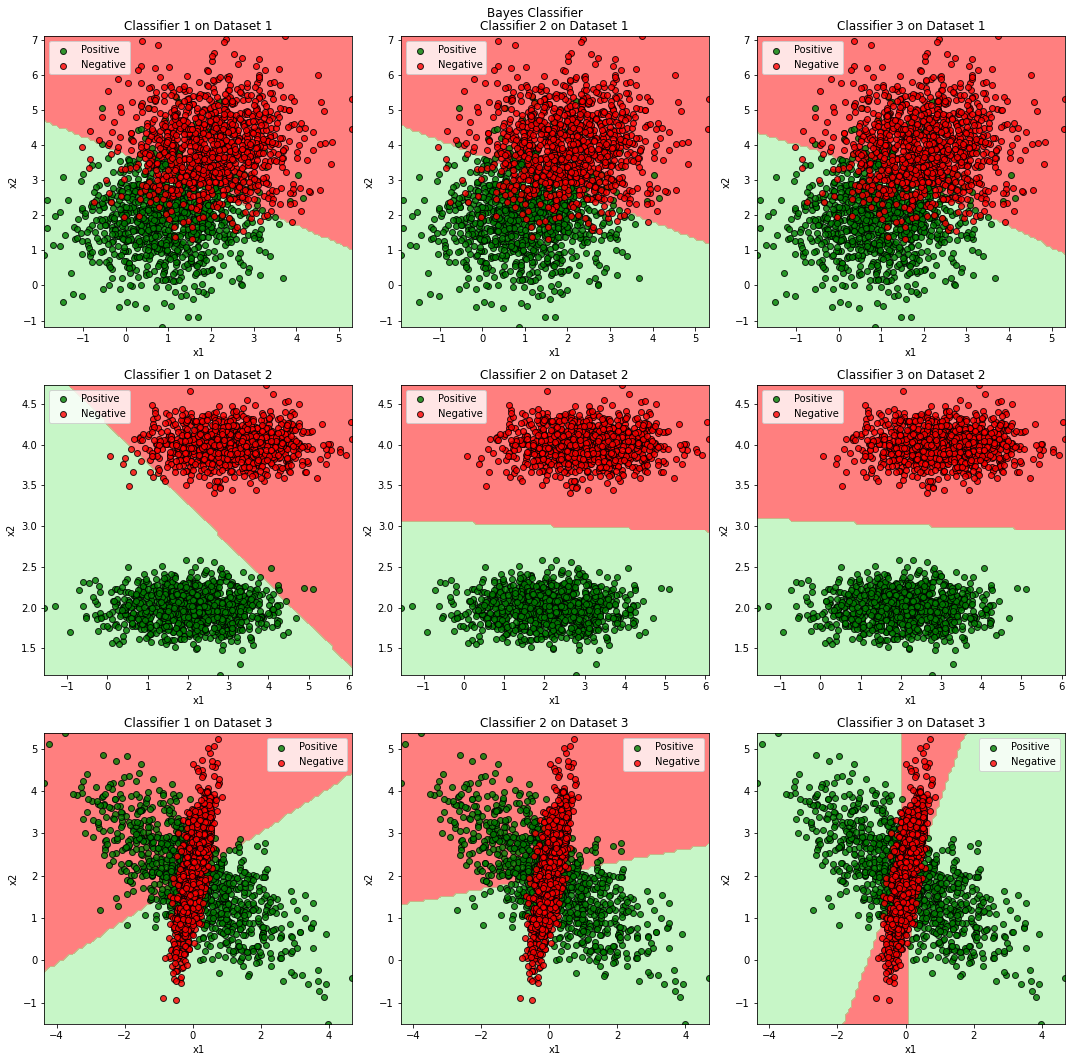

"for i in range(3):\n    for j in range(3):\n        print(f'The misclassification error by classifier {j+1} on Test dataset {i+1} is {100*misclassification_error(Y_tests[i],Y_test_preds[i][j])} %')\n"

In [5]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

def plot_classifier_1(X_train,Y_train,axs):
    x1=np.linspace(min(X_train[:,0]),max(X_train[:,0]),100)
    x2=np.linspace(min(X_train[:,1]),max(X_train[:,1]),100)
    X1,X2=np.meshgrid(x1,x2)
    labels=np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            labels[i][j]=Bayes1a(X_train,Y_train,np.array([[x1[i],x2[j]]]))
    #plt.figure(figsize=(8,8))
    axs.contourf(X1,X2,labels.T,levels=[-2,0,2],colors=['red','lightgreen'],alpha=0.5)
    axs.scatter(X_train[np.where(Y_train==1),0],X_train[np.where(Y_train==1),1],c='green',alpha=0.8,label='Positive',edgecolor='Black')
    axs.scatter(X_train[np.where(Y_train==-1),0],X_train[np.where(Y_train==-1),1],c='red',alpha=0.8,label='Negative',edgecolor='Black')

    axs.set_xlabel('x1')
    axs.set_ylabel('x2')
    axs.legend()
    

def plot_classifier_2(X_train,Y_train,axs):
    x1=np.linspace(min(X_train[:,0]),max(X_train[:,0]),100)
    x2=np.linspace(min(X_train[:,1]),max(X_train[:,1]),100)
    X1,X2=np.meshgrid(x1,x2)
    labels=np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            labels[i][j]=Bayes1b(X_train,Y_train,np.array([[x1[i],x2[j]]]))
    #plt.figure(figsize=(8,8))
    axs.contourf(X1,X2,labels.T,levels=[-2,0,2],colors=['red','lightgreen'],alpha=0.5)
    axs.scatter(X_train[np.where(Y_train==1),0],X_train[np.where(Y_train==1),1],c='green',alpha=0.8,label='Positive',edgecolor='Black')
    axs.scatter(X_train[np.where(Y_train==-1),0],X_train[np.where(Y_train==-1),1],c='red',alpha=0.8,label='Negative',edgecolor='Black')

    axs.set_xlabel('x1')
    axs.set_ylabel('x2')
    axs.legend()


def plot_classifier_3(X_train,Y_train,axs):
    x1=np.linspace(min(X_train[:,0]),max(X_train[:,0]),100)
    x2=np.linspace(min(X_train[:,1]),max(X_train[:,1]),100)
    X1,X2=np.meshgrid(x1,x2)
    labels=np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            labels[i][j]=Bayes1c(X_train,Y_train,np.array([[x1[i],x2[j]]]))
    #plt.figure(figsize=(8,8))
    axs.contourf(X1,X2,labels.T,levels=[-2,0,2],colors=['red','lightgreen'],alpha=0.5)
    axs.scatter(X_train[np.where(Y_train==1),0],X_train[np.where(Y_train==1),1],c='green',alpha=0.8,label='Positive',edgecolor='Black')
    axs.scatter(X_train[np.where(Y_train==-1),0],X_train[np.where(Y_train==-1),1],c='red',alpha=0.8,label='Negative',edgecolor='Black')

    axs.set_xlabel('x1')
    axs.set_ylabel('x2')
    axs.legend()


def misclassification_error(Y_test,Y_test_pred):
    error=0
    for i in np.array(np.where(Y_test==1)).reshape((1000,1)):
        if Y_test_pred[i]==-1:
            error+=1
    for i in np.array(np.where(Y_test==-1)).reshape((1000,1)):
        if Y_test_pred[i]==1:
            error+=1
    error/=Y_test.shape[0]
    return error

parameters1=np.load('Data/dataset1_1.npz')
parameters2=np.load('Data/dataset1_2.npz')
parameters3=np.load('Data/dataset1_3.npz')

X_train1=parameters1.get('arr_0')
Y_train1=parameters1.get('arr_1')
X_test1=parameters1.get('arr_2')
Y_test1=parameters1.get('arr_3')

X_train2=parameters2.get('arr_0')
Y_train2=parameters2.get('arr_1')
X_test2=parameters2.get('arr_2')
Y_test2=parameters2.get('arr_3')

X_train3=parameters3.get('arr_0')
Y_train3=parameters3.get('arr_1')
X_test3=parameters3.get('arr_2')
Y_test3=parameters3.get('arr_3')

X_trains=[X_train1,X_train2,X_train3]
Y_trains=[Y_train1,Y_train2,Y_train3]
fig,axs=plt.subplots(3,3,figsize=((15,15)))
classifiers=[plot_classifier_1,plot_classifier_2,plot_classifier_3]
for i in range(3):
    for j in range(3):
        classifiers[j](X_trains[i],Y_trains[i],axs[i][j])
        axs[i][j].set_title(f'Classifier {j+1} on Dataset {i+1}')
plt.suptitle('Bayes Classifier ')
plt.tight_layout()

plt.show()

Y_test1_pred1=Bayes1a(X_train1,Y_train1,X_test1)
Y_test1_pred2=Bayes1b(X_train1,Y_train1,X_test1)
Y_test1_pred3=Bayes1c(X_train1,Y_train1,X_test1)

Y_test2_pred1=Bayes1a(X_train2,Y_train2,X_test2)
Y_test2_pred2=Bayes1b(X_train2,Y_train2,X_test2)
Y_test2_pred3=Bayes1c(X_train2,Y_train2,X_test2)

Y_test3_pred1=Bayes1a(X_train3,Y_train3,X_test3)
Y_test3_pred2=Bayes1b(X_train3,Y_train3,X_test3)
Y_test3_pred3=Bayes1c(X_train3,Y_train3,X_test3)


Y_tests=[Y_test1,Y_test2,Y_test3]
Y_test_preds=[[Y_test1_pred1,Y_test1_pred2,Y_test1_pred3],[Y_test2_pred1,Y_test2_pred2,Y_test2_pred3],[Y_test3_pred1,Y_test3_pred2,Y_test3_pred3]]
"""for i in range(3):
    for j in range(3):
        print(f'The misclassification error by classifier {j+1} on Test dataset {i+1} is {100*misclassification_error(Y_tests[i],Y_test_preds[i][j])} %')
"""




**Cell type : TextWrite** 
(Write your observations and table of errors here)

1. Classifiers 1 and 2 are linear classifiers whereas classifier 3 is a non linear classifier.
2. Dataset 1 is almost linearly seperable. The 3 classifiers perform almost equally on the test dataset1, with classifier 2 and 3 faring slightly better.
3. Dataset 2 is linearly seperable. Due to the overassumptions in classifier 1 ,it doesnt acheive a 100% accuracy in this case as well. Classifiers 2 and 3 achieve 100% accuracy on the test dataset.
4. Whereas in dataset 3 , the 2 class conditioned distributions literally cross over each other. Hence only classifier 3 achieves a reasonably good performance with an error rate of 13.5%.
    
|Dataset | Classifier-1 | Classifier-2 |Classifier-3|
|--------|-------------|-------------|-----------|
|1           |  12.6%          | 12.45%          |    12.45%     |
|2           |  0.85%          |  0.0%           |     0.0%      |
|3           |    49.7%        | 49.5%           |    13.5%      |




** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [2]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    def eta(x):

        eta_=np.zeros(4)
        Y_1=np.array(np.where(Y_train==1))
        Y_2=np.array(np.where(Y_train==2))
        Y_3=np.array(np.where(Y_train==3))
        Y_4=np.array(np.where(Y_train==4))
        Y=[Y_1,Y_2,Y_3,Y_4]
        a1=Y_1.shape[1]/(Y_1.shape[1]+Y_2.shape[1]+Y_3.shape[1]+Y_4.shape[1])
        a2=Y_2.shape[1]/(Y_1.shape[1]+Y_2.shape[1]+Y_3.shape[1]+Y_4.shape[1])
        a3=Y_3.shape[1]/(Y_1.shape[1]+Y_2.shape[1]+Y_3.shape[1]+Y_4.shape[1])
        a4=Y_4.shape[1]/(Y_1.shape[1]+Y_2.shape[1]+Y_3.shape[1]+Y_4.shape[1])
        mu_1=np.mean(X_train[np.where(Y_train==1)],axis=0)
        mu_2=np.mean(X_train[np.where(Y_train==2)],axis=0)
        mu_3=np.mean(X_train[np.where(Y_train==3)],axis=0)
        mu_4=np.mean(X_train[np.where(Y_train==4)],axis=0)
        mu=[mu_1,mu_2,mu_3,mu_4]
        a=[a1,a2,a3,a4]
        for i in range(4):
            eta_[i]=a[i]*(np.exp(-0.5*sum(np.square(x-mu[i]))))/sum([a[j]*(np.exp(-0.5*sum(np.square(x-mu[j])))) for j in range(4)])
        return eta_
    etas=np.array([eta(X_test[i]) for i in range(X_test.shape[0])])
    L=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    #print(etas[0].T.shape)
    Y_test_pred=np.array([np.argmin(np.matmul(etas[i].T,L))+1 for i in range (X_test.shape[0])])
    loss=sum([np.dot(etas[i],L.T[Y_test_pred[i]-1]) for i in range(X_test.shape[0])])/X_test.shape[0]
    return [Y_test_pred,loss]

    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    def eta(x):
        eta_=np.zeros(4)
        Y_1=np.array(np.where(Y_train==1))
        Y_2=np.array(np.where(Y_train==2))
        Y_3=np.array(np.where(Y_train==3))
        Y_4=np.array(np.where(Y_train==4))
        Y=[Y_1,Y_2,Y_3,Y_4]
        a1=Y_1.shape[1]/(Y_1.shape[1]+Y_2.shape[1]+Y_3.shape[1]+Y_4.shape[1])
        a2=Y_2.shape[1]/(Y_1.shape[1]+Y_2.shape[1]+Y_3.shape[1]+Y_4.shape[1])
        a3=Y_3.shape[1]/(Y_1.shape[1]+Y_2.shape[1]+Y_3.shape[1]+Y_4.shape[1])
        a4=Y_4.shape[1]/(Y_1.shape[1]+Y_2.shape[1]+Y_3.shape[1]+Y_4.shape[1])
        mu_1=np.mean(X_train[np.where(Y_train==1)],axis=0)
        mu_2=np.mean(X_train[np.where(Y_train==2)],axis=0)
        mu_3=np.mean(X_train[np.where(Y_train==3)],axis=0)
        mu_4=np.mean(X_train[np.where(Y_train==4)],axis=0)
        mu=[mu_1,mu_2,mu_3,mu_4]
        a=[a1,a2,a3,a4]
        covar=np.cov(X_train,rowvar=False)
        for i in range(4):
            eta_[i]=a[i]*(np.exp(-0.5*np.matmul(np.matmul((x-mu[i]).T,np.linalg.inv(covar)),x-mu[i])))/sum([a[j]*(np.exp(-0.5*np.matmul(np.matmul((x-mu[j]).T,np.linalg.inv(covar)),x-mu[j]))) for j in range(4)])
        return eta_
    etas=np.array([eta(X_test[i]) for i in range(X_test.shape[0])])
    L=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    #print(etas[0].T.shape)
    Y_test_pred=np.array([np.argmin(np.matmul(etas[i].T,L))+1 for i in range (X_test.shape[0])])
    loss=sum([np.dot(etas[i],L.T[Y_test_pred[i]-1]) for i in range(X_test.shape[0])])/X_test.shape[0]
    return [Y_test_pred,loss]
    

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    def eta(x):
        eta_=np.zeros(4)
        Y_1=np.array(np.where(Y_train==1))
        Y_2=np.array(np.where(Y_train==2))
        Y_3=np.array(np.where(Y_train==3))
        Y_4=np.array(np.where(Y_train==4))
        Y=[Y_1,Y_2,Y_3,Y_4]
        a1=Y_1.shape[1]/(Y_1.shape[1]+Y_2.shape[1]+Y_3.shape[1]+Y_4.shape[1])
        a2=Y_2.shape[1]/(Y_1.shape[1]+Y_2.shape[1]+Y_3.shape[1]+Y_4.shape[1])
        a3=Y_3.shape[1]/(Y_1.shape[1]+Y_2.shape[1]+Y_3.shape[1]+Y_4.shape[1])
        a4=Y_4.shape[1]/(Y_1.shape[1]+Y_2.shape[1]+Y_3.shape[1]+Y_4.shape[1])
        mu_1=np.mean(X_train[np.where(Y_train==1)],axis=0)
        mu_2=np.mean(X_train[np.where(Y_train==2)],axis=0)
        mu_3=np.mean(X_train[np.where(Y_train==3)],axis=0)
        mu_4=np.mean(X_train[np.where(Y_train==4)],axis=0)
        mu=[mu_1,mu_2,mu_3,mu_4]
        a=[a1,a2,a3,a4]
        covar1=np.cov(X_train[np.where(Y_train==1)],rowvar=False)
        covar2=np.cov(X_train[np.where(Y_train==2)],rowvar=False)
        covar3=np.cov(X_train[np.where(Y_train==3)],rowvar=False)
        covar4=np.cov(X_train[np.where(Y_train==4)],rowvar=False)
        covar=np.array([covar1,covar2,covar3,covar4])

        for i in range(4):
            eta_[i]=(a[i]/(np.linalg.det(covar[i]))**0.5)*(np.exp(-0.5*np.matmul(np.matmul((x-mu[i]).T,np.linalg.inv(covar[i])),x-mu[i])))/sum([(a[j]/(np.linalg.det(covar[j]))**0.5)*(np.exp(-0.5*np.matmul(np.matmul((x-mu[j]).T,np.linalg.inv(covar[j])),x-mu[j]))) for j in range(4)])
        return eta_
    etas=np.array([eta(X_test[i]) for i in range(X_test.shape[0])])
    L=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    #print(etas[0].T.shape)
    Y_test_pred=np.array([np.argmin(np.matmul(etas[i].T,L))+1 for i in range (X_test.shape[0])])
    loss=sum([np.dot(etas[i],L.T[Y_test_pred[i]-1]) for i in range(X_test.shape[0])])/X_test.shape[0]
    return [Y_test_pred,loss]
    
    

    
    


    


In [17]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,5.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[5.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[5.,5.]])
X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,5.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[5.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[5.,5.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



(4000,)
(4000,)
(4000,)


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


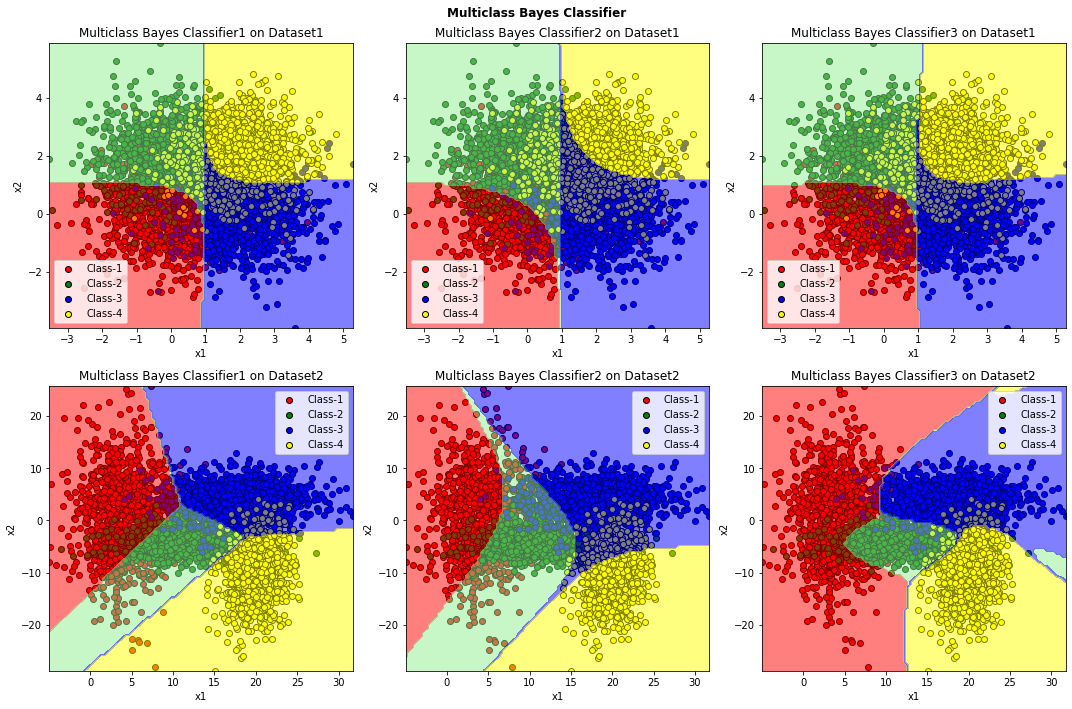

[[0.44672873 0.69172788 0.45082247]
 [0.01263124 0.60766687 0.13888165]]


In [5]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
parameters1=np.load('Data/dataset2_1.npz')
X_train_1=parameters1.get('arr_0')
Y_train_1=parameters1.get('arr_1')
X_test_1=parameters1.get('arr_2')
Y_test_1=parameters1.get('arr_3')
parameters2=np.load('Data/dataset2_2.npz')
X_train_2=parameters2.get('arr_0')
Y_train_2=parameters2.get('arr_1')
X_test_2=parameters2.get('arr_2')
Y_test_2=parameters2.get('arr_3')
def plot_classifier(X_train,Y_train,axs,dataset):
    x1=np.linspace(min(X_train[:,0]),max(X_train[:,0]),100)
    x2=np.linspace(min(X_train[:,1]),max(X_train[:,1]),100)
    X1,X2=np.meshgrid(x1,x2)
    labels=np.zeros((100,100))
    for k in range(3):
        for i in range(100):
            for j in range(100):
                labels[i][j]=classifiers[k](X_train,Y_train,np.array([[x1[i],x2[j]]]))[0]
        #plt.figure(figsize=(8,8))
        #axs[k].contourf(X1,X2,labels.T,levels=[0.5,1.5,2.5,3.5,4.5],colors=['red','lightgreen','blue','yellow'],alpha=0.5)
        axs[k].scatter(X_train[np.where(Y_train==1),0],X_train[np.where(Y_train==1),1],c='red',alpha=1,label='Class-1',edgecolor='Black')
        axs[k].scatter(X_train[np.where(Y_train==2),0],X_train[np.where(Y_train==2),1],c='green',alpha=1,label='Class-2',edgecolor='Black')

        axs[k].scatter(X_train[np.where(Y_train==3),0],X_train[np.where(Y_train==3),1],c='blue',alpha=1,label='Class-3',edgecolor='Black')
        axs[k].scatter(X_train[np.where(Y_train==4),0],X_train[np.where(Y_train==4),1],c='yellow',alpha=1,label='Class-4',edgecolor='Black')
        axs[k].contourf(X1,X2,labels.T,levels=[0.5,1.5,2.5,3.5,4.5],colors=['red','lightgreen','blue','yellow'],alpha=0.5)

        
        axs[k].set_xlabel('x1')
        axs[k].set_ylabel('x2')
        axs[k].set_title(f'Multiclass Bayes Classifier{k+1} on {dataset}')
        axs[k].legend()
fig,axs=plt.subplots(2,3,figsize=(15,10))
X_trains=[X_train_1,X_train_2]
Y_trains=[Y_train_1,Y_train_2]
X_tests=[X_test_1,X_test_2]
classifiers=[Bayes2a,Bayes2b,Bayes2c]
expected_loss=np.zeros((2,3))
for i in range(2):
    plot_classifier(X_trains[i],Y_trains[i],axs[i],f'Dataset{i+1}')
plt.suptitle('Multiclass Bayes Classifier',fontweight='bold')
plt.tight_layout()

plt.show()
for i in range(2):
    for j in range(3):
        expected_loss[i][j]=classifiers[j](X_trains[i],Y_trains[i],X_tests[i])[1]
print(f'Expected loss for the 2x3 classifiers{expected_loss}')

In [8]:
Y_test1_pred1=Bayes2a(X_train_1,Y_train_1,X_test_1)[0]
Y_test1_pred2=Bayes2b(X_train_1,Y_train_1,X_test_1)[0]
Y_test1_pred3=Bayes2c(X_train_1,Y_train_1,X_test_1)[0]

Y_test2_pred1=Bayes2a(X_train_2,Y_train_2,X_test_2)[0]
Y_test2_pred2=Bayes2b(X_train_2,Y_train_2,X_test_2)[0]
Y_test2_pred3=Bayes2c(X_train_2,Y_train_2,X_test_2)[0]

Y_tests=[Y_test_1,Y_test_2]
Y_test_preds=[Y_test1_pred1,Y_test1_pred2,Y_test1_pred3,Y_test2_pred1,Y_test2_pred2,Y_test2_pred3]
L=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
confusion_matrices=np.zeros((6,4,4))
for k in range(6):
    for i in range(4):
        for j in range(4):
            confusion_matrices[k][i][j]=sum(Y_test_preds[k][np.where(Y_tests[k//3]==i+1)]==j+1)
    print(f'Confusion Matrix for Test Dataset {k//3 +1} by classifier {k%3 +1}')
    print(confusion_matrices[k])
        


Confusion Matrix for Test Dataset 1 by classifier 1
[[633. 219. 136.  12.]
 [ 97. 738.  62. 103.]
 [ 86.  49. 770.  95.]
 [ 15. 136. 194. 655.]]
Confusion Matrix for Test Dataset 1 by classifier 2
[[463. 388. 145.   4.]
 [ 43. 791. 113.  53.]
 [ 40.  95. 818.  47.]
 [  4. 149. 346. 501.]]
Confusion Matrix for Test Dataset 1 by classifier 3
[[633. 218. 138.  11.]
 [ 99. 742.  61.  98.]
 [ 87.  47. 772.  94.]
 [ 15. 134. 201. 650.]]
Confusion Matrix for Test Dataset 2 by classifier 1
[[830. 150.  18.   2.]
 [ 93. 784.  46.  77.]
 [ 30.  61. 905.   4.]
 [  0.  23.  78. 899.]]
Confusion Matrix for Test Dataset 2 by classifier 2
[[675. 302.  23.   0.]
 [ 39. 749. 205.   7.]
 [  7. 118. 875.   0.]
 [  0.   3. 297. 700.]]
Confusion Matrix for Test Dataset 2 by classifier 3
[[901.  80.  19.   0.]
 [ 64. 824.  47.  65.]
 [ 19.  31. 936.  14.]
 [  0.  36.  48. 916.]]


**Cell type : TextWrite** 
(Write your observations and table of errors here)
1. This problem uses a weighted loss function instead of the regular zero-one loss. Hence the goal of the classifiers is not to achieve the lowest missclassification error. Rather, it is to ensure that missclassifications with a greater penalty is avoided.
2. In this case, classifier 1 and 3 has performed better on the  than classifier 2 on dataset 1 with classifier 1 performing marginally better than classifier 3.
3. Classifier 1 has performed best on test dataset 2 followed by classifier 3 and classifier 2.

**Table of Errors**
| Dataset| Classifier-1 | Classifier-2 |Classifier-3|
|--------|-------------|--------------|-----------|
|1           |  0.44672873         | 0.69172788          |    0.45082247     |
|2           |  0.01263124          |  0.60766687           |     0.13888165      |




In [ ]:
# Cell type: convenience



**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




The lowest test error obtained on using a training set of size 50 is : 0.15628448214586468
The corresponding hyperparameter values (degree,lambda) is : (2, 0.1)
The numpy 2 D array showing performance on training  and test data for different hyper parameter values:
The lowest test error obtained on using a training set of size 100 is : 0.15083229930971592
The corresponding hyperparameter values (degree,lambda) is : (2, 0.1)
The numpy 2 D array showing performance on training  and test data for different hyper parameter values:
The lowest test error obtained on using a training set of size 200 is : 0.05138042502250789
The corresponding hyperparameter values (degree,lambda) is : (16, 1e-09)
The numpy 2 D array showing performance on training  and test data for different hyper parameter values:
The lowest test error obtained on using a training set of size 1000 is : 0.0004157919625606092
The corresponding hyperparameter values (degree,lambda) is : (16, 1e-09)
The numpy 2 D array showing p

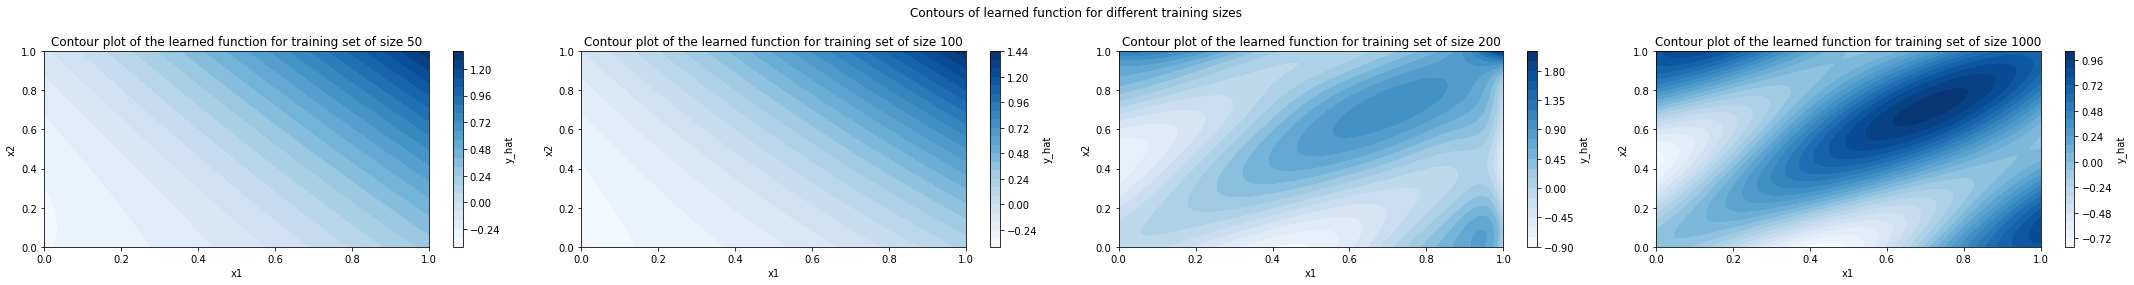

In [77]:
# Cell type : CodeWrite 
#Defining hyperparameter handles
degrees = [1,2,4,8,16]
lambdas=[1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 10]
ebest=1e+3
def fac(n):
    return n*fac(n-1) if  n>1 else  1


def phi_map(x,k):
    # Feature mapping of a 2 dimensional input vectot x into a d_ dimensional feature vector phi
    n=x.shape[0]
    d_=int(fac(2+k)/(fac(2)*fac(k)))
    phi=np.zeros((n,d_))
    phi[:,0]=1
    col=0
    for m in range(k+1):
        for n in range(k+1-m):
                phi[:,col]=(x[:,0]**m)*(x[:,1]**n)
                col+=1
    return phi

def regress(X,y,X_test,y_test):
    ebest=1e+3
    degrees = [1,2,4,8,16]
    lambdas=[1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 10]
    table1=np.zeros((5,6,2))
    for i in range(len(degrees)):
        for j in range(len(lambdas)):
            k=degrees[i]
            lambda_=lambdas[j]
            phi_train=phi_map(X,k)
            phi_test=phi_map(X_test,k)
            w=np.matmul(np.linalg.inv(np.matmul(np.transpose(phi_train),phi_train)+lambda_*(np.eye(phi_train.shape[1]))),np.matmul(np.transpose(phi_train),y))
            y_train_hat=np.matmul(phi_train,w)
            y_train_error=(np.square(np.linalg.norm(y-y_train_hat)))/phi_train.shape[0]
            y_test_hat=np.matmul(phi_test,w)
            y_test_error=(np.square(np.linalg.norm(y_test-y_test_hat)))/phi_test.shape[0]
            if y_test_error<ebest:
                ebest=y_test_error
                wbest=w
                kbest=k
                lambdabest=lambda_
            table1[i,j]=[y_train_error,y_test_error]
    return[table1,ebest,wbest,kbest,lambdabest]

def contour(k,W,axs):
    x1=np.linspace(0,1,100)
    x2=np.linspace(0,1,100)
    y=np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            y[i][j]=np.matmul(phi_map(np.array([[x1[i],x2[j]]]),k),W)
    contour_plot=axs.contourf(x1,x2,y.T,levels=25,cmap='Blues')
    return contour_plot



#Loading the .npz file containing data
parameters=np.load('Data/dataset3_1.npz')

#Obtaining the Training instances and its corresponding output values.
X_train=parameters.get('arr_2')
y_train=parameters.get('arr_3')

#Obtaining the Test instances along with its corresponding output values
X_test=parameters.get('arr_0')
y_test=parameters.get('arr_1')
# Considering training subsets of different sizes
X=[X_train[0:50],X_train[0:100],X_train[0:200],X_train[0:1000]]
y=[y_train[0:50],y_train[0:100],y_train[0:200],y_train[0:1000]]
# Polynomial Regression on the training data of different sizes for different hyperparameter values and analysing the performance on Test Data 
results=[]
for i in range(4):
    results.append(regress(X[i],y[i],X_test,y_test))
    print(f'The lowest test error obtained on using a training set of size {y[i].shape[0]} is : {results[i][1]}')
    print(f'The corresponding hyperparameter values (degree,lambda) is : {results[i][3],results[i][4]}')
    print(f'The numpy 2 D array showing performance on training  and test data for different hyper parameter values:')
    #print(results[0])
    """print('|Degree|Lambda(1e-9)|Lambda(1e-7)|Lamda(1e-5)|Lambda(1e-3)|Lambda(1e-1)|Lambda(1e-0)|')
    print('|-|-|-|-|-|-|-')
    for k in range(5):
        s=''
        s+=(f'| {degrees[k]} |\t')
        for j in range(6):
            s+=(f'{results[0][k][j]} |')
        print(s)"""

    # Contour plot for the learned function whose hyperparameter values gave the best results on the test dataset
fig,axs=plt.subplots(1,4,figsize=(30,4))
for i in range(4):
    contour_plot=contour(results[i][3],results[i][2],axs[i])
    axs[i].set_xlabel('x1')
    axs[i].set_ylabel('x2')
    axs[i].set_title(f'Contour plot of the learned function for training set of size {y[i].shape[0]}')
    fig.colorbar(contour_plot,label='y_hat',ax=axs[i])
plt.suptitle('Contours of learned function for different training sizes')
plt.tight_layout()
plt.show()


        



**Cell type : TextWrite**
1. As the size of the training data was increased, the best learned function producing lowest test error moved from (k,lambda)=(2,0.1) to (16,1e-9).
**Train-Test Error Table:**
Training Size 50:

|Degree|Lambda(1e-9)|Lambda(1e-7)|Lamda(1e-5)|Lambda(1e-3)|Lambda(1e-1)|Lambda(10)|
|-|-|-|-|-|-|-
| 1 |	[0.25186768 0.25410085] |[0.25186768 0.25410085] |[0.25186768 0.25410083] |[0.25186768 0.25409935] |[0.25186809 0.253953  ] |[2.53143831e-01 2.47353816e-01] |
| 2 |	[0.11703411 0.15674749] |[0.11703411 0.15674749] |[0.11703411 0.15674744] |[0.11703411 0.15674245] |[0.11707142 0.15628448] |[1.70353813e-01 1.83629978e-01] |
| 4 |	[0.04976476 0.71113752] |[0.04976476 0.71113422] |[0.04976477 0.7108044 ] |[0.04978762 0.67956288] |[0.07169878 0.21496426] |[1.57262930e-01 1.75888728e-01] |
| 8 |	[9.31865133e-06 2.69019731e+02] |[1.77045589e-04 4.15225438e+01] |[1.38919981e-03 1.58709148e+01] |[0.01275504 2.44584578] |[0.05972354 0.28263661] |[1.53180858e-01 1.77071288e-01] |
| 16 |	[5.62263143e-08 3.95157606e+01] |[1.22968882e-05 4.40997675e+01] |[7.07591441e-04 1.94670799e+01] |[0.00990943 5.69494649] |[0.05716663 0.30636526] |[1.52148973e-01 1.80848099e-01] |

Training Size 100:

|Degree|Lambda(1e-9)|Lambda(1e-7)|Lamda(1e-5)|Lambda(1e-3)|Lambda(1e-1)|Lambda(10)|
|-|-|-|-|-|-|-
| 1 |	[0.28856688 0.25019219] |[0.28856688 0.25019219] |[0.28856688 0.25019219] |[0.28856688 0.25019168] |[0.28856695 0.25014112] |[2.88986108e-01 2.46706171e-01] |
| 2 |	[0.13061693 0.15119034] |[0.13061693 0.15119034] |[0.13061693 0.1511903 ] |[0.13061693 0.15118662] |[0.1306292 0.1508323] |[1.64849112e-01 1.60137425e-01] |
| 4 |	[0.10127606 0.17068518] |[0.10127606 0.17068515] |[0.10127606 0.17068262] |[0.10127659 0.17043112] |[0.10396306 0.15751991] |[1.57011560e-01 1.58100076e-01] |
| 8 |	[0.0209111  1.60245639] |[0.02091115 1.59681758] |[0.02126035 1.16475415] |[0.03925151 0.19067057] |[0.07739441 0.17447444] |[1.56185944e-01 1.62131239e-01] |
| 16 |	[8.29112626e-06 1.02015059e+02] |[3.31666368e-04 9.68240077e+01] |[0.00647526 5.65268381] |[0.03026347 1.0289281 ] |[0.06390455 0.23408959] |[1.53564688e-01 1.64150741e-01] |

Training Size 200:

|Degree|Lambda(1e-9)|Lambda(1e-7)|Lamda(1e-5)|Lambda(1e-3)|Lambda(1e-1)|Lambda(10)|
|-|-|-|-|-|-|-
| 1 |	[0.25262559 0.24790438] |[0.25262559 0.24790438] |[0.25262559 0.24790438] |[0.25262559 0.24790421] |[0.2526256  0.24788704] |[2.52709128e-01 2.46482746e-01] |
| 2 |	[0.13440055 0.14504862] |[0.13440055 0.14504862] |[0.13440055 0.14504862] |[0.13440055 0.14504871] |[0.13440274 0.14505968] |[1.44860217e-01 1.54174027e-01] |
| 4 |	[0.11057442 0.15883693] |[0.11057442 0.15883693] |[0.11057442 0.15883628] |[0.1105745 0.1587713] |[0.11114298 0.15402006] |[1.43636952e-01 1.55414742e-01] |
| 8 |	[0.05487384 0.16497612] |[0.05487384 0.16496651] |[0.05487497 0.16402778] |[0.05738099 0.13288715] |[0.0844682  0.13525293] |[1.40604363e-01 1.57298129e-01] |
| 16 |	[3.52007639e-05 5.13804250e-02] |[0.00108632 0.5356977 ] |[0.01163662 0.60859564] |[0.04479164 0.10525684] |[0.07489979 0.13895403] |[1.33123253e-01 1.54371660e-01] |

Training Size 1000:

|Degree|Lambda(1e-9)|Lambda(1e-7)|Lamda(1e-5)|Lambda(1e-3)|Lambda(1e-1)|Lambda(10)|
|-|-|-|-|-|-|-
| 1 |	[0.25367333 0.24319312] |[0.25367333 0.24319312] |[0.25367333 0.24319312] |[0.25367333 0.24319312] |[0.25367333 0.24319217] |[2.53674279e-01 2.43100838e-01] |
| 2 |	[0.13850145 0.14214615] |[0.13850145 0.14214615] |[0.13850145 0.14214615] |[0.13850145 0.14214609] |[0.13850155 0.14214041] |[1.39375582e-01 1.42421417e-01] |
| 4 |	[0.12238449 0.13291378] |[0.12238449 0.13291378] |[0.12238449 0.13291376] |[0.12238449 0.13291146] |[0.12239616 0.13269997] |[1.34536518e-01 1.38480970e-01] |
| 8 |	[0.06764791 0.09339346] |[0.06764791 0.09339325] |[0.06764793 0.09337268] |[0.0677951  0.09182392] |[0.08856399 0.10213277] |[1.27139063e-01 1.33220699e-01]|
| 16 |	[2.50634545e-05 4.15791963e-04] |[0.00047193 0.0007194 ] |[0.00658552 0.01565078] |[0.03726896 0.05906644] |[0.07880019 0.09794918] |[1.19489141e-01 1.27055074e-01] |

**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











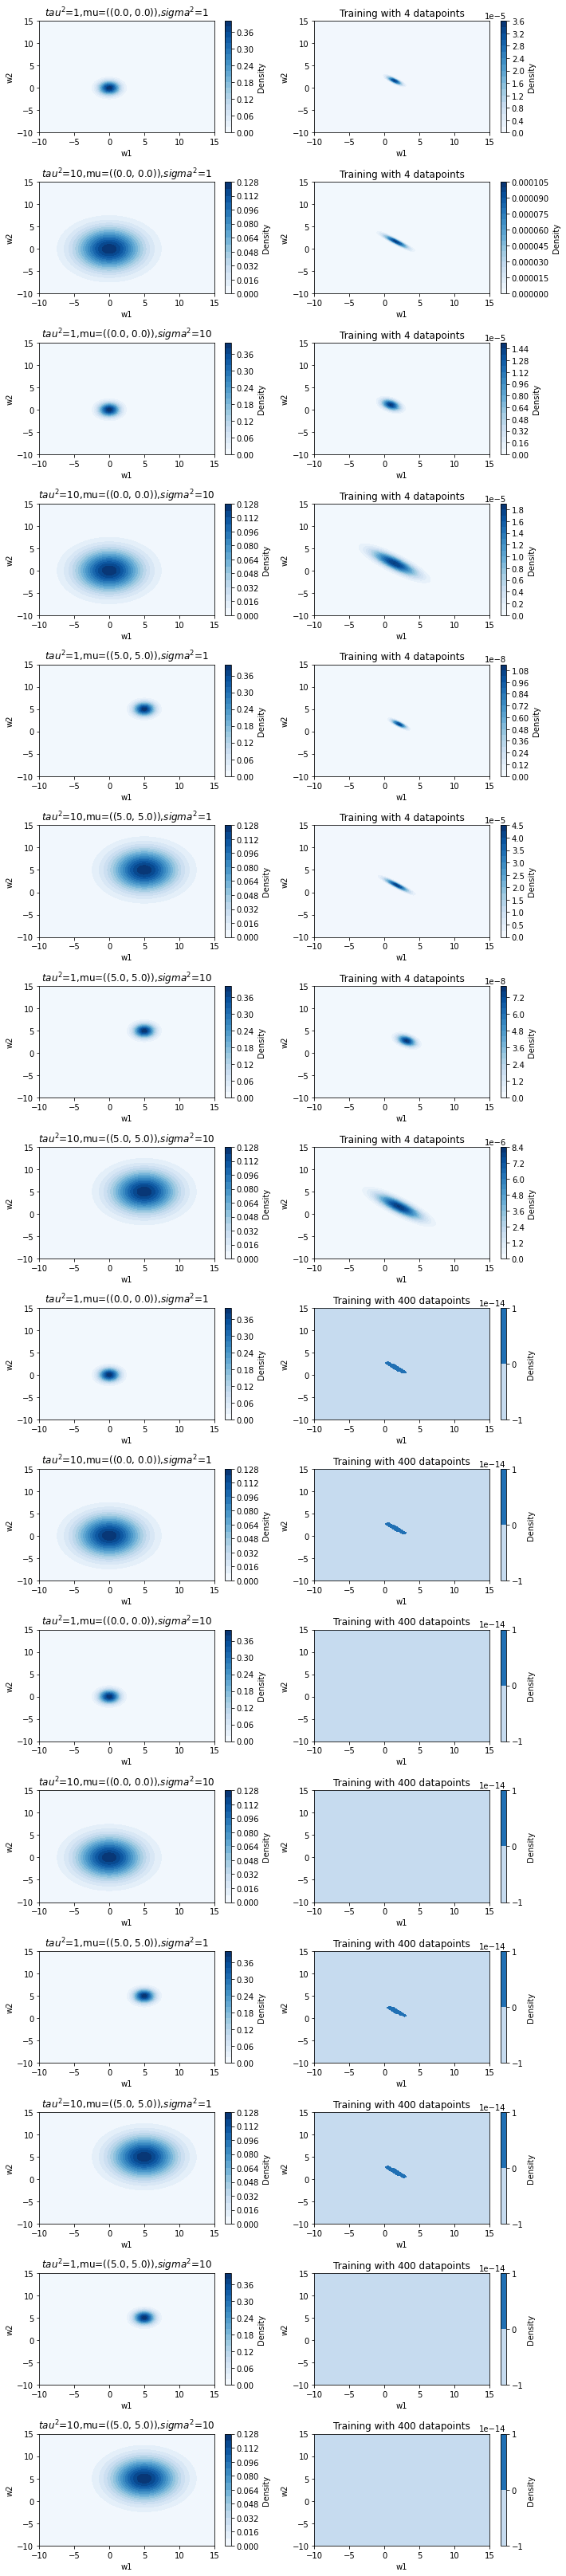

In [3]:
# Cell type : CodeWrite 
def prior_contour(mu,tau_sq,axs):
    tau=tau_sq**0.5
    k=np.ceil(6*tau) if np.ceil(6*tau)%2==0 else np.ceil(6*tau)+1
    w1=np.linspace(mu[0]-k//2,mu[0]+k//2,100)
    w2=np.linspace(mu[1]-k//2,mu[1]+k//2,100)
    w1=np.linspace(-10,15,100)
    w2=np.linspace(-10,15,100)
    labels=np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            labels[j][i]=(1/((2*np.pi)**0.5*tau))*(np.exp(-((w1[i]-mu[0])**2+(w2[j]-mu[1])**2)/(2*tau_sq)))
    a=axs.contourf(w1,w2,labels,levels=20,cmap='Blues')
    """axs.set_xlabel('w1')
    axs.set_ylabel('w2')"""
    return a
    #plt.colorbar()
def posterior_contour(mu,tau_sq,sigma_sq,X,y,axs):
    tau=tau_sq**0.5
    k=np.ceil(6*tau) if np.ceil(6*tau)%2==0 else np.ceil(6*tau)+1
    w1=np.linspace(mu[0]-k//2,mu[0]+k//2,100)
    w2=np.linspace(mu[1]-k//2,mu[1]+k//2,100)
    w1=np.linspace(-10,15,100)
    w2=np.linspace(-10,15,100)
    labels=np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            labels[j][i]=(1/((2*np.pi)**0.5*tau))*(np.exp(-((w1[i]-mu[0])**2+(w2[j]-mu[1])**2)/(2*(tau)**2)))
            for k in range(X.shape[0]):
                labels[j][i]*=(1/((2*np.pi*sigma_sq)**0.5))*(np.exp(-((y[k]-w1[i]*X[k][0]-w2[j]*X[k][1])**2/(2*sigma_sq))))
    b=axs.contourf(w1,w2,labels,levels=20,cmap='Blues')
    """axs.set_xlabel('w1')
    axs.set_ylabel('w2')"""
    #fig.colorbar(axs)
    return b
    #plt.colorbar()
x=np.array([[1.,2,],[2.,2.1],[0.6,0.5],[1.1,0.9]])
y=np.array([5.1,6.1,4.2,2.9])
x_=np.tile(x,(100,1))
y_=np.tile(y,100)
X=[x,x_]
Y=[y,y_]
mu=np.concatenate((np.zeros((4,2)),5*np.ones((4,2))),axis=0)
tau_sq=np.array([1,10,1,10,1,10,1,10])
sigma_sq=np.array([1,1,10,10,1,1,10,10])
"""fig,axs=plt.subplots(1,2,figsize=(10,5))
prior_contour(mu[0],tau_sq[0],axs[0])
posterior_contour(mu[0],tau_sq[0],sigma_sq[0],X,y,axs[1])"""
fig,axs=plt.subplots(16,2,figsize=(10,45))
posteriors=['Training with 4 datapoints','Training with 400 datapoints']
for i in range(16):
    j=i%8
    k=i//8
    a=prior_contour(mu[j],tau_sq[j],axs[i][0])
    axs[i][0].set_xlabel('w1')
    axs[i][0].set_ylabel('w2')
    axs[i][0].set_title(f'$tau^2$={tau_sq[j]},mu=({mu[j][0],mu[j][1]}),$sigma^2$={sigma_sq[j]}')
    fig.colorbar(a,label='Density',ax=axs[i][0])
    b=posterior_contour(mu[j],tau_sq[j],sigma_sq[j],X[k],Y[k],axs[i][1])
    axs[i][1].set_title(f'{posteriors[k]}')
    axs[i][1].set_xlabel('w1')
    axs[i][1].set_ylabel('w2')
    fig.colorbar(b,label='Density',ax=axs[i][1])
#plt.suptitle('Bayesian Regression',x=0.5,y=0.05,horizontalalignment='center')
plt.tight_layout()
   
plt.show()


**Cell type : TextWrite**

**Conclusions**
1. The prior distribution of W in all the 16 cases is a gaussioan centered at mu with a variance of tau<sup>2</sup> .
2. When both sigma<sup>2</sup> and tau<sup>2</sup> are small,the spread of the gaussians of the prior and posterior distributions are small.
3. When the value of tau<sup>2</sup> is increased, keeping sigma<sup>2</sup> constant, the spread of the prior distribution is a much larger circle and the the high confidence regions of the  posterior increases in length.
4. When the value of sigma<sup>2</sup> is increased, keeping tau<sup>2</sup> constant,the gaussion spread of the prior distribution is small and the posterior seems only slightly different from the prior(rotated by an angle).
5. When both sigma<sup>2</sup> and tau<sup>2</sup> are large, the spread of the gaussians of the prior and posterior distributions is larger.
6. When the number of data points used for training are increased, we can observe that posterior is not determined with a much greater confidence level . In cases where sigma<sup>2</sup> =10, the posterior distribution is nearly uniform 
 

**Cell type : TextRead**

# 5. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [74]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here
def sigmoid(a):
        return 1/(1+np.exp(-a))
def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., 
                                   kernel_param=1., num_iter_gd=100):
    n=(X).shape[0]
    k=np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            if kernel=='linear':
                k[i][j]=1+np.dot(X[i],X[j])
            elif kernel=='poly':
                k[i][j]=(1+np.dot(X[i],X[j]))**kernel_param
            else:
                k[i][j]=np.exp(-(kernel_param*np.square(np.linalg.norm(X[i]-X[j]))))
    
    
    def do_grad_descent(X,Y,eta,k):
        alpha=np.random.uniform(0,1,n)
        alpha=np.zeros(n)
        riskold=1000
        for i in range(num_iter_gd):
            risknew=-sum([np.log(sigmoid(Y[j]*np.dot(alpha,k[j]))) for j in range(n)])+(reg_param/2)*(np.matmul(alpha.T,np.matmul(k,alpha)))
            #print(risknew)
            del_risk=np.sum(np.array([(sigmoid(-Y[j]*np.dot(alpha,k[:,j].T))*(-Y[j]))*(k[:,j].T)  for j in range(n)]),axis=0) +eta*reg_param*(np.matmul(k,alpha))
            if abs(risknew-riskold)<1e-4:
                break
            """if abs(risknew-riskold)>1e+3:
                break"""
            """if risknew>riskold:
                break"""
            
                
            riskold=risknew
            alpha-=(eta)*del_risk
        return risknew,alpha
        
    if X.shape[1]>10:
        etas=[1e-17,1e-12,1e-10,1e-9]
    else:
        etas=[1e-7,5e-6,1e-5]
    riskmin=1000
    eta_best=12
    alpha_best=np.zeros(n)

    for eta in etas:
        current_risk,current_alpha=do_grad_descent(X,Y,eta,k)
        if current_risk<riskmin:
            riskmin=current_risk
            #print(current_risk)
            eta_best=eta
            alpha_best=current_alpha
    #print(f'{eta_best} hi')
    #print(alpha_best)
    return alpha_best
        


    

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    n=train_X.shape[0]
    #k=np.zeros((n,n))
    def kernel(u,v,kernel,kernel_param=1):
        if kernel=='linear':
                return 1+np.dot(u,v)
        elif kernel=='poly':
                return (1+np.dot(u,v))**kernel_param
        else:
                return np.exp(-(kernel_param*np.square(np.linalg.norm(u-v))))
    """for i in range(n):
        for j in range(n):
            k[i][j]=kernel(train_X[i],train_X[j],kernel,kernel_param)"""
    test_y=np.zeros(test_X.shape[0])
    for i in range(test_X.shape[0]):
        test_y[i]=1 if sigmoid(sum([alpha[j]*kernel(train_X[j],test_X[i],kernel,kernel_param) for j in range(n)]))>0.5 else -1
    return test_y


    

    



In [81]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 

"""def evaluate_logistic(X_train,y_train,X_val,y_val,hyperparameters,kernel):
    if kernels=='linear':
            hyper_parameters=np.array([np.array([1,lambdas[j]]) for j in range(len(lambdas))])
        elif kernels=='poly':
            r,l=np.meshgrid(reg_params_poly,lambdas)
            hyper_parameters=np.column_stack((r.ravel(),l.ravel()))
        else:
            r,l=np.meshgrid(reg_params_rbf[i],lambdas)
            hyper_parameters=np.column_stack((r.ravel(),l.ravel()))
    errorbest=0.5
    return 1
"""
set_a=np.load('Data/dataset_A.npz')
set_b=np.load('Data/dataset_B.npz')
set_c=np.load('Data/dataset_C.npz')
set_d=np.load('Data/dataset_D.npz')

X_train_a=set_a.get('arr_0')[0:1000,:]
y_train_a=set_a.get('arr_1')[0:1000]
X_val_a=set_a.get('arr_0')[1000:]
y_val_a=set_a.get('arr_1')[1000:]
X_test_a=set_a.get('arr_2')
y_test_a=set_a.get('arr_3')

X_train_b=set_b.get('arr_0')[0:1000]
y_train_b=set_b.get('arr_1')[0:1000]
X_val_b=set_b.get('arr_0')[1000:]
y_val_b=set_b.get('arr_1')[1000:]
X_test_b=set_b.get('arr_2')
y_test_b=set_b.get('arr_3')

X_train_c=set_c.get('arr_0')[0:1000]
y_train_c=set_c.get('arr_1')[0:1000]
X_val_c=set_c.get('arr_0')[1000:]
y_val_c=set_c.get('arr_1')[1000:]
X_test_c=set_c.get('arr_2')
y_test_c=set_c.get('arr_3')

X_train_d=set_d.get('arr_0')[:300]
X_val_d=set_d.get('arr_0')[300:]
y_val_d=set_d.get('arr_1')[300:]
y_train_d=set_d.get('arr_1')[0:300]
X_test_d=set_d.get('arr_2')
y_test_d=set_d.get('arr_3')
X_trains=[X_train_a,X_train_b,X_train_c,X_train_d]
y_trains=[y_train_a,y_train_b,y_train_c,y_train_d]
X_vals=[X_val_a,X_val_b,X_val_c,X_val_d]
y_vals=[y_val_a,y_val_b,y_val_c,y_val_d]
X_tests=[X_test_a,X_test_b,X_test_c,X_test_d]
y_tests=[y_test_a,y_test_b,y_test_c,y_test_d]
alphas_best=[[],[]]
kernels_best=np.zeros((2,3))


#print(y_test_a)
lambdas=np.array([1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3])
reg_params_poly=np.array([2,3,4,5])
median=np.zeros(4)
for i in range(4):
    distances=[]
    for j in range(X_trains[i].shape[0]):
        for k in range(j+1,X_trains[i].shape[0]):
            distances.append(np.linalg.norm(X_trains[i][j]-X_trains[i][k]))
    temp=np.array(distances)
    median[i]=np.median(temp)
reg_params_rbf=np.array([np.array([0.1*(1/median[i]**2),0.5*(1/median[i]**2),(1/median[i]**2),(10/(median[i]**2))]) for i in range(4)])

kernels=['linear','poly','rbf']
datasets=['dataset a','dataset b','dataset c',' dataset d']

for i in range(2,4):
    y_preds_test=[[],[],[]]
    y_preds_train=[[],[],[]]
    for j in range(3):
        #print(i,j)
        if kernels[j]=='linear':
            hyper_parameters=np.array([np.array([1,lambdas[j]]) for j in range(len(lambdas))])
        elif kernels[j]=='poly':
            r,l=np.meshgrid(reg_params_poly,lambdas)
            hyper_parameters=np.column_stack((r.ravel(),l.ravel()))
        else:
            r,l=np.meshgrid(reg_params_rbf[i],lambdas)
            hyper_parameters=np.column_stack((r.ravel(),l.ravel()))
        errorbest=1
        for k in range(hyper_parameters.shape[0]):
            #print(i,j,k)
            alpha=(train_pred_logistic_regression(X_trains[i], y_trains[i], kernel=kernels[j], reg_param=hyper_parameters[k][1], 
                                   kernel_param=hyper_parameters[k][0], num_iter_gd=500))
            y_val_pred=test_pred(alpha, X_trains[i], y_trains[i], X_vals[i], kernels[j], hyper_parameters[k][0])
            y_pred_train=test_pred(alpha, X_trains[i], y_trains[i], X_trains[i],kernels[j], hyper_parameters[k][0])

            zero_one_error_val=0.5*sum(abs(y_pred_train-y_trains[i]))/(y_trains[i].shape[0])
            if zero_one_error_val<errorbest:
                errorbest=zero_one_error_val
                alpha_best=alpha
                lambda_best=hyper_parameters[k][1]
                kernel_best=hyper_parameters[k][0]
        #alpha_best
        if i<2:
            alphas_best[i].append(alpha_best)
            kernels_best[i][j]=kernel_best
        y_pred_test=test_pred(alpha_best, X_trains[i], y_trains[i], X_tests[i],kernels[j], kernel_best)
        y_pred_train=test_pred(alpha_best, X_trains[i], y_trains[i], X_trains[i],kernels[j], kernel_best)
        """print(f'The best hyperparameter settings for {datasets[i]} using {kernels[j]} kernel is lambda={lambda_best} and kernel_param={kernel_best}')
        print(f'The zero-one training error is {0.5*sum(abs(y_pred_train-y_trains[i]))/(y_trains[i].shape[0])}')
        print(f'The zero-one test error is {0.5*sum(abs(y_pred_test-y_tests[i]))/(y_tests[i].shape[0])}')"""


"for i in range(4):\n    distances=[]\n    for j in range(X_trains[i].shape[0]):\n        for k in range(j+1,X_trains[i].shape[0]):\n            distances.append(np.linalg.norm(X_trains[i][j]-X_trains[i][k]))\n    temp=np.array(distances)\n    median[i]=np.median(temp)\nreg_params_rbf=np.array([np.array([0.1*(1/median[i]**2),0.5*(1/median[i]**2),(1/median[i]**2),(10/(median[i]**2))]) for i in range(4)])\n\nkernels=['linear','poly','rbf']\ndatasets=['dataset a','dataset b','dataset c',' dataset d']\n\nfor i in range(2,4):\n    y_preds_test=[[],[],[]]\n    y_preds_train=[[],[],[]]\n    for j in range(3):\n        #print(i,j)\n        if kernels[j]=='linear':\n            hyper_parameters=np.array([np.array([1,lambdas[j]]) for j in range(len(lambdas))])\n        elif kernels[j]=='poly':\n            r,l=np.meshgrid(reg_params_poly,lambdas)\n            hyper_parameters=np.column_stack((r.ravel(),l.ravel()))\n        else:\n            r,l=np.meshgrid(reg_params_rbf[i],lambdas)\n          

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

Hyperparameter choices:

Regularisation parameter: 1e-4,1e-3,1e-2,1e-1,1,10,100,1000

Kernel params: 

 Polynomial Regression :2,3,4,5
 
 Rbf kernel: 0.1|(median^2),0.5|(median^2),1|(median^2),10|(median^2)


    The best hyperparameter settings for  dataset a using linear kernel is lambda=10.0 and kernel_param=1.0
    The zero-one training error is 0.174
    The zero-one test error is 0.184

    The best hyperparameter settings for  dataset a using poly kernel is lambda=0.0001 and kernel_param=3.0
    The zero-one training error is 0.08
    The zero-one test error is 0.072

    The best hyperparameter settings for  dataset a using rbf kernel is lambda=0.0001 and kernel_param=7.587690294697865
    The zero-one training error is 0.003
    The zero-one test error is 0.002

    The best hyperparameter settings for  dataset b using linear kernel is lambda=0.0001 and kernel_param=1.0
    The zero-one training error is 0.175
    The zero-one test error is 0.202

    The best hyperparameter settings for  dataset b using poly kernel is lambda=10.0 and kernel_param=3.0
    The zero-one training error is 0.173
    The zero-one test error is 0.21

    The best hyperparameter settings for  dataset b using rbf kernel is lambda=0.0001 and kernel_param=9.662555930302192
    The zero-one training error is 0.168
    The zero-one test error is 0.206

    The best hyperparameter settings for dataset c using linear kernel is lambda=0.0001 and kernel_param=1.0
    The zero-one training error is 0.102
    The zero-one test error is 0.4882154882154882

    The best hyperparameter settings for dataset c using poly kernel is lambda=0.0001 and kernel_param=2.0
    The zero-one training error is 0.496
    The zero-one test error is 0.4882154882154882

    The best hyperparameter settings for  dataset c using rbf kernel is lambda=0.0001 and kernel_param=0.004194630872483222
    The zero-one training error is 0.009
    The zero-one test error is 0.06060606060606061

    The best hyperparameter settings for   dataset d using linear kernel is lambda=0.0001 and kernel_param=1.0
    The zero-one training error is 0.25666666666666665
    The zero-one test error is 0.7633136094674556

    The best hyperparameter settings for   dataset d using poly kernel is lambda=0.1 and kernel_param=4.0
    The zero-one training error is 0.16666666666666666
    The zero-one test error is 0.7692307692307693

    The best hyperparameter settings for   dataset d using rbf kernel is lambda=0.0001 and kernel_param=3.666747865728979e-05
    The zero-one training error is 0.12666666666666668
    The zero-one test error is 0.05325443786982249




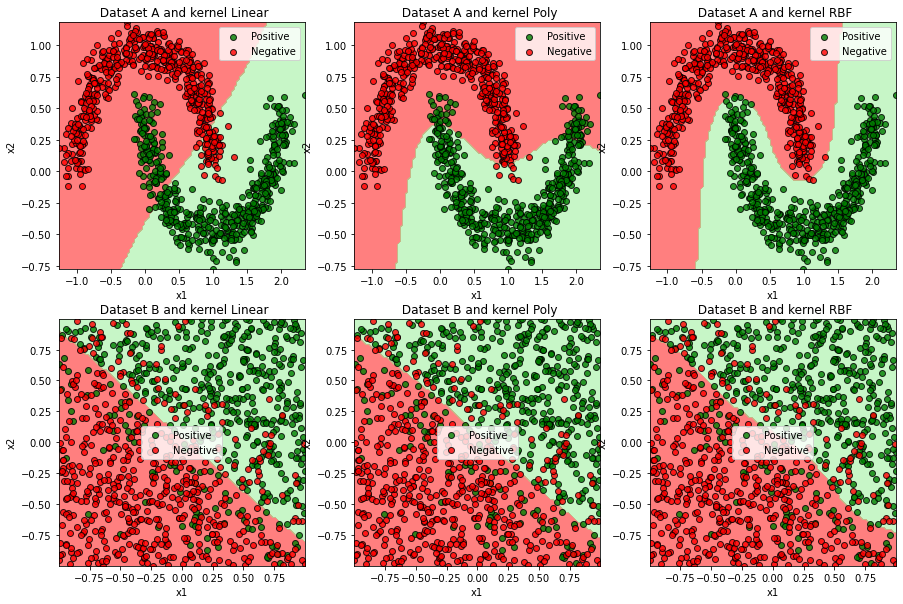

In [79]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
    
    #plt.figure(figsize=(8,8))

def plot_classifier(X_train,y_train,alpha,kernel,kernel_param,axs):
    x1=np.linspace(min(X_train[:,0]),max(X_train[:,0]),100)
    x2=np.linspace(min(X_train[:,1]),max(X_train[:,1]),100)
    X1,X2=np.meshgrid(x1,x2)
    labels=np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            labels[i][j]=test_pred(alpha, X_train, y_train, np.array([x1[i],x2[j]]).reshape(1,2), kernel, kernel_param)
    axs.contourf(X1,X2,labels.T,levels=[-2,0,2],colors=['red','lightgreen'],alpha=0.5)
    axs.scatter(X_train[np.where(y_train==1),0],X_train[np.where(y_train==1),1],c='green',alpha=0.8,label='Positive',edgecolor='Black')
    axs.scatter(X_train[np.where(y_train==-1),0],X_train[np.where(y_train==-1),1],c='red',alpha=0.8,label='Negative',edgecolor='Black')

    axs.set_xlabel('x1')
    axs.set_ylabel('x2')
    
    axs.legend()

fig,axs=plt.subplots(2,3,figsize=(15,10))
datasets=['Dataset A','Dataset B']
kernels=['Linear','Polynomial','RBF']

set_a=np.load('dataset_A.npz')
set_b=np.load('dataset_B.npz')

X_train_a=set_a.get('arr_0')[0:1000,:]
y_train_a=set_a.get('arr_1')[0:1000]

X_train_b=set_b.get('arr_0')[0:1000]
y_train_b=set_b.get('arr_1')[0:1000]


X_trains=[X_train_a,X_train_b]
y_trains=[y_train_a,y_train_b]

for i in range(2):
    for j in range(3):
        plot_classifier(X_trains[i],y_trains[i],alphas_best[i][j],kernels[j],kernels_best[i][j],axs[i][j])
        axs[i][j].set_title(f' {datasets[i]} and  {kernels[j]} kernel')


**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [56]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)
def evaluate(left_X,left_Y,right_X,right_Y,criterion):
    pl=left_Y.shape[0]/(left_Y.shape[0]+right_Y.shape[0])
    pr=1-pl
    if pl==0 :
        error_left=0
        entropy_left=0
    else:
        ql_positive=sum(left_Y+1)/(sum(left_Y+1)-sum(left_Y-1))
        ql_negative=1-ql_positive
        ql=[ql_positive,ql_negative]
        error_left=1-max(ql)
        if 0 in ql:
            entropy_left=0
        else: 
            entropy_left=ql_positive*np.log(1/ql_positive)+(ql_negative)*np.log(1/ql_negative)
    if pr==0:
        error_right=0
        entropy_right=0
    else:
        qr_positive=sum(right_Y+1)/(sum(right_Y+1)-sum(right_Y-1))
        qr_negative=1-qr_positive
        qr=[qr_positive,qr_negative]
        error_right=1-max(qr)
        if 0 in qr:
            entropy_right=0
        else:
            entropy_right=qr_positive*(np.log(1/qr_positive))+qr_negative*(np.log(1/qr_negative))
    if criterion=='accuracy':
        return pl*(error_left)+pr*(error_right)
    else:
        return pl*(entropy_left)+pr*(entropy_right)

def train_decision_tree(X, Y,bins, num_nodes_stop=1, criterion='accuracy'):
    """ Returns a decision tree trained on X and Y. 
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    """bins=np.zeros((X.shape[1],100))
    for i in range(X.shape[1]):
        bins[i]=np.linspace(np.min(X[:,i]),np.max(X[:,i]),100)"""
    emin=10
    if X.shape[0]<num_nodes_stop or abs(sum(Y))==Y.shape[0]:
        return np.sign(sum(Y))
    for i in range(X.shape[1]):
        for j in range(len(bins[i])):
            left_X=X[np.where(X[:,i]<bins[i][j])]
            left_Y=Y[np.where(X[:,i]<bins[i][j])]
            right_X=X[np.where(X[:,i]>=bins[i][j])]
            right_Y=Y[np.where(X[:,i]>=bins[i][j])]
            e=evaluate(left_X,left_Y,right_X,right_Y,criterion)
            if e<emin:
                emin=e
                best_left_X=left_X
                best_left_Y=left_Y
                best_right_X=right_X
                best_right_Y=right_Y
                best_dim=[i,j]
                best_split=bins[i][j]
    if best_dim==[0,0]:
        i=np.random.randint(0,X.shape[1])
        j=np.random.randint(0,len(bins[i]))
        best_left_X=X[np.where(X[:,i]<bins[i][j])]
        best_left_Y=Y[np.where(X[:,i]<bins[i][j])]
        best_right_X=X[np.where(X[:,i]>=bins[i][j])]
        best_right_Y=Y[np.where(X[:,i]>=bins[i][j])]
        best_dim=[i,j]
        best_split=bins[i][j]

    bins_left=bins+[]
    bins_right=bins+[]
    bins_left[best_dim[0]]=bins_left[best_dim[0]][0:best_dim[1]]
    bins_right[best_dim[0]]=bins_right[best_dim[0]][best_dim[1]:]
    #left_tree=
    #right_tree=
    return {(best_dim[0],best_split):[train_decision_tree(best_left_X,best_left_Y,bins_left,num_nodes_stop,criterion),train_decision_tree(best_right_X,best_right_Y,bins_right,num_nodes_stop,criterion)]}
    """if (best_left_X.shape[0]<=num_nodes_stop or abs(sum(best_left_Y))==best_left_X.shape[0]) and (best_right_X.shape[0]<=num_nodes_stop or abs(sum(best_right_Y))==best_right_X.shape[0]):
        return [(node_pos,best_dim,best_split,np.sign(sum(best_right_Y)))]
    elif (best_left_X.shape[0]<=num_nodes_stop or abs(sum(best_left_Y))==best_left_X.shape[0]) and (best_right_X.shape[0]>num_nodes_stop and abs(sum(best_right_Y))!=best_right_X.shape[0]):
`   """
 


def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    if type(tree)!=dict:
            return tree*np.ones(test_X.shape[0])
    
    def solve(tree,x):
        while type(tree)==dict:
            curr_root_node=list(list(tree.keys())[0])
            if x[curr_root_node[0]]>=curr_root_node[1]:
                tree=tree[list(tree.keys())[0]][1]
            else:
                tree=tree[list(tree.keys())[0]][0]   
        
        return tree
    
    test_Y=np.zeros(test_X.shape[0])
    for i in range(test_X.shape[0]):
        test_Y[i]=solve(tree,test_X[i])
    return test_Y
        






In [59]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.
def evaluate_best_hyperparameter(X_train,y_train,X_val,y_val,criterion='accuracy'):
    hyper_parameters=[1,5,15,25,60]
    bins=[]
    emin=10
    for i in range(X_train.shape[1]):
        bins.append(np.linspace(np.min(X_train[:,i]),np.max(X_train[:,i]),250).tolist())
    for i in hyper_parameters:
        tree_temp=train_decision_tree(X_train, y_train,bins, num_nodes_stop=i, criterion=criterion)
        y_val_pred=eval_decision_tree(tree_temp,X_val)
        e_curr=(0.5*sum(abs(y_val_pred-y_val))/(y_val.shape[0]))
        if e_curr<emin:
            emin=e_curr
            hyperparameter_best=i
            tree_best=tree_temp
    return tree_best,hyperparameter_best

set_a=np.load('Data/dataset_A.npz')
set_b=np.load('Data/dataset_B.npz')
set_c=np.load('Data/dataset_C.npz')
set_d=np.load('Data/dataset_D.npz')

X_train_a=set_a.get('arr_0')[0:1000,:]
y_train_a=set_a.get('arr_1')[0:1000]
X_val_a=set_a.get('arr_0')[1000:]
y_val_a=set_a.get('arr_1')[1000:]
X_test_a=set_a.get('arr_2')
y_test_a=set_a.get('arr_3')

X_train_b=set_b.get('arr_0')[0:1000]
y_train_b=set_b.get('arr_1')[0:1000]
X_val_b=set_b.get('arr_0')[1000:]
y_val_b=set_b.get('arr_1')[1000:]
X_test_b=set_b.get('arr_2')
y_test_b=set_b.get('arr_3')

X_train_c=set_c.get('arr_0')[0:1000]
y_train_c=set_c.get('arr_1')[0:1000]
X_val_c=set_c.get('arr_0')[1000:]
y_val_c=set_c.get('arr_1')[1000:]
X_test_c=set_c.get('arr_2')
y_test_c=set_c.get('arr_3')

X_train_d=set_d.get('arr_0')[:300]
X_val_d=set_d.get('arr_0')[300:]
y_val_d=set_d.get('arr_1')[300:]
y_train_d=set_d.get('arr_1')[0:300]
X_test_d=set_d.get('arr_2')
y_test_d=set_d.get('arr_3')
datasets=['Dataset A','Dataset B','Dataset C','Dataset D']
X_trains=[X_train_a,X_train_b,X_train_c,X_train_d]
y_trains=[y_train_a,y_train_b,y_train_c,y_train_d]
X_vals=[X_val_a,X_val_b,X_val_c,X_val_d]
y_vals=[y_val_a,y_val_b,y_val_c,y_val_d]
X_tests=[X_test_a,X_test_b,X_test_c,X_test_d]
y_tests=[y_test_a,y_test_b,y_test_c,y_test_d]
trees_accuracy=[]
#hyper_parameters_accuracy=[]
trees_entropy=[]
#hyper_parameters_entropy=[]
for i in range(4):
    tree1,hyp1=evaluate_best_hyperparameter(X_trains[i],y_trains[i],X_vals[i],y_vals[i],'accuracy')
    tree2,hyp2=evaluate_best_hyperparameter(X_trains[i],y_trains[i],X_vals[i],y_vals[i],'entropy')
    trees_accuracy.append(tree1)
    trees_entropy.append(tree2)

    y_train_pred_accuracy=eval_decision_tree(tree1,X_trains[i])
    train_error_acurracy=(0.5*sum(abs(y_train_pred_accuracy-y_trains[i]))/(y_trains[i].shape[0]))
    y_test_pred_accuracy=eval_decision_tree(tree1,X_tests[i])
    test_error_acurracy=(0.5*sum(abs(y_test_pred_accuracy-y_tests[i]))/(y_tests[i].shape[0]))

    y_train_pred_entropy=eval_decision_tree(tree2,X_trains[i])
    train_error_entropy=(0.5*sum(abs(y_train_pred_entropy-y_trains[i]))/(y_trains[i].shape[0]))
    y_test_pred_entropy=eval_decision_tree(tree2,X_tests[i])
    test_error_entropy=(0.5*sum(abs(y_test_pred_entropy-y_tests[i]))/(y_tests[i].shape[0]))
    
    print(f'The best hyperparameter for {datasets[i]}  when using accuracy as the criterion is {hyp1}')
    print(f'The training & test error on using accuracy as the criterion is {train_error_acurracy,test_error_acurracy} ')
    print(f'The best hyperparameter for {datasets[i]}  when using entropy as the criterion is {hyp2}')
    print(f'The training & test error on using entropy as the criterion is {train_error_entropy,test_error_entropy} \n')



    """hyper_parameters_accuracy.append(hyp1)
    hyper_parameters_entropy.append(hyp2)"""
    



The best hyperparameter for Dataset A  when using accuracy as the criterion is 5
The training & test error on using accuracy as the criterion is (0.001, 0.014) 
The best hyperparameter for Dataset A  when using entropy as the criterion is 1
The training & test error on using entropy as the criterion is (0.0, 0.008) 

The best hyperparameter for Dataset B  when using accuracy as the criterion is 60
The training & test error on using accuracy as the criterion is (0.166, 0.228) 
The best hyperparameter for Dataset B  when using entropy as the criterion is 60
The training & test error on using entropy as the criterion is (0.158, 0.212) 

The best hyperparameter for Dataset C  when using accuracy as the criterion is 5
The training & test error on using accuracy as the criterion is (0.006, 0.11952861952861953) 
The best hyperparameter for Dataset C  when using entropy as the criterion is 5
The training & test error on using entropy as the criterion is (0.003, 0.10101010101010101) 

The best 

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).  

Hyperparameter Choices:[1,5,15,25,60]

The best hyperparameter for Dataset A  when using accuracy as the criterion is 5

The training & test error on using accuracy as the criterion is (0.001, 0.014)

The best hyperparameter for Dataset A  when using entropy as the criterion is 1

The training & test error on using entropy as the criterion is (0.0, 0.008) 

The best hyperparameter for Dataset B  when using accuracy as the criterion is 60

The training & test error on using accuracy as the criterion is (0.166, 0.228) 

The best hyperparameter for Dataset B  when using entropy as the criterion is 60

The training & test error on using entropy as the criterion is (0.158, 0.212) 

The best hyperparameter for Dataset C  when using accuracy as the criterion is 5

The training & test error on using accuracy as the criterion is (0.006, 0.11952861952861953)

The best hyperparameter for Dataset C  when using entropy as the criterion is 5

The training & test error on using entropy as the criterion is (0.003, 0.10101010101010101) 

The best hyperparameter for Dataset D  when using accuracy as the criterion is 15

The training & test error on using accuracy as the criterion is (0.023333333333333334, 0.10059171597633136) 

The best hyperparameter for Dataset D  when using entropy as the criterion is 1

The training & test error on using entropy as the criterion is (0.0, 0.10650887573964497) 



Text(0.5, 0.98, 'Decision trees')

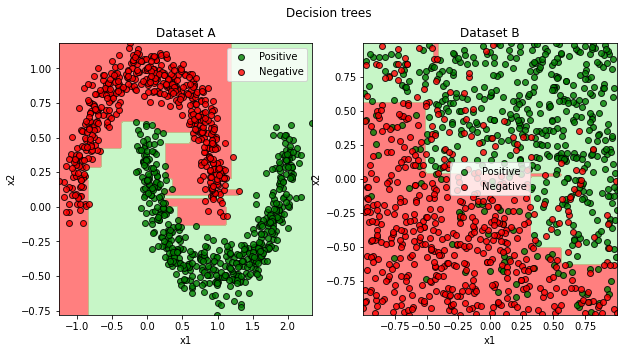

In [60]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
def plot_classifier(X_train,Y_train,axs,tree):
    x1=np.linspace(min(X_train[:,0]),max(X_train[:,0]),100)
    x2=np.linspace(min(X_train[:,1]),max(X_train[:,1]),100)
    X1,X2=np.meshgrid(x1,x2)
    labels=np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            labels[i][j]=eval_decision_tree(tree,np.array([[x1[i],x2[j]]]))[0]
    #plt.figure(figsize=(8,8))
    axs.contourf(X1,X2,labels.T,levels=[-2,0,2],colors=['red','lightgreen'],alpha=0.5)
    axs.scatter(X_train[np.where(Y_train==1),0],X_train[np.where(Y_train==1),1],c='green',alpha=0.8,label='Positive',edgecolor='Black')
    axs.scatter(X_train[np.where(Y_train==-1),0],X_train[np.where(Y_train==-1),1],c='red',alpha=0.8,label='Negative',edgecolor='Black')

    axs.set_xlabel('x1')
    axs.set_ylabel('x2')
    
    axs.legend()
fig,axs=plt.subplots(1,2,figsize=(10,5))
for i in range(2):
    plot_classifier(X_trains[i],y_trains[i],axs[i],trees_accuracy[i])
    axs[i].set_title(f'{datasets[i]}')
plt.suptitle('Decision trees')
#plt.show()


**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [79]:
# CodeWrite cell
# Write Random Forest classifier. 

def evaluate(left_X,left_Y,right_X,right_Y,criterion):
    pl=left_Y.shape[0]/(left_Y.shape[0]+right_Y.shape[0])
    pr=1-pl
    if pl==0 :
        error_left=0
        entropy_left=0
    else:
        ql_positive=sum(left_Y+1)/(sum(left_Y+1)-sum(left_Y-1))
        ql_negative=1-ql_positive
        ql=[ql_positive,ql_negative]
        error_left=1-max(ql)
        if 0 in ql:
            entropy_left=0
        else: 
            entropy_left=ql_positive*np.log(1/ql_positive)+(ql_negative)*np.log(1/ql_negative)
    if pr==0:
        error_right=0
        entropy_right=0
    else:
        qr_positive=sum(right_Y+1)/(sum(right_Y+1)-sum(right_Y-1))
        qr_negative=1-qr_positive
        qr=[qr_positive,qr_negative]
        error_right=1-max(qr)
        if 0 in qr:
            entropy_right=0
        else:
            entropy_right=qr_positive*(np.log(1/qr_positive))+qr_negative*(np.log(1/qr_negative))
    if criterion=='accuracy':
        return pl*(error_left)+pr*(error_right)
    else:
        return pl*(entropy_left)+pr*(entropy_right)

def random_decision_tree(X, Y,bins, num_nodes_stop=1, criterion='accuracy',a=0.5,b=0.5):
    """ Returns a decision tree trained on X and Y. 
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    """bins=np.zeros((X.shape[1],100))
    for i in range(X.shape[1]):
        bins[i]=np.linspace(np.min(X[:,i]),np.max(X[:,i]),100)"""
    emin=10
    d=X.shape[1]
    features=np.random.randint(0,d,d//2)
    

    if X.shape[0]<num_nodes_stop or abs(sum(Y))==Y.shape[0]:
        return np.sign(sum(Y))
    for i in features:
        for j in range(len(bins[i])):
            left_X=X[np.where(X[:,i]<bins[i][j])]
            left_Y=Y[np.where(X[:,i]<bins[i][j])]
            right_X=X[np.where(X[:,i]>=bins[i][j])]
            right_Y=Y[np.where(X[:,i]>=bins[i][j])]
            e=evaluate(left_X,left_Y,right_X,right_Y,criterion)
            if e<emin:
                emin=e
                best_left_X=left_X
                best_left_Y=left_Y
                best_right_X=right_X
                best_right_Y=right_Y
                best_dim=[i,j]
                best_split=bins[i][j]
    if best_dim==[0,0]:
        i=np.random.randint(0,X.shape[1])
        j=np.random.randint(0,len(bins[i]))
        best_left_X=X[np.where(X[:,i]<bins[i][j])]
        best_left_Y=Y[np.where(X[:,i]<bins[i][j])]
        best_right_X=X[np.where(X[:,i]>=bins[i][j])]
        best_right_Y=Y[np.where(X[:,i]>=bins[i][j])]
        best_dim=[i,j]
        best_split=bins[i][j]

    bins_left=bins+[]
    bins_right=bins+[]
    bins_left[best_dim[0]]=bins_left[best_dim[0]][0:best_dim[1]]
    bins_right[best_dim[0]]=bins_right[best_dim[0]][best_dim[1]:]
    #left_tree=
    #right_tree=
    return {(best_dim[0],best_split):[random_decision_tree(best_left_X,best_left_Y,bins_left,num_nodes_stop,criterion),random_decision_tree(best_right_X,best_right_Y,bins_right,num_nodes_stop,criterion)]}
    
def train_random_forest(X, Y,bins, num_trees=10, num_nodes_stop=1, 
                        criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y. 
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """
    random_forest=[]
    n=X.shape[0]
    d=X.shape[1]
    features=np.random.randint(0,d,d//2)
    for i in range(num_trees):
        indices=np.random.randint(0,n,n//2)
        X_train=X[indices,:]
        Y_train=Y[indices]
        random_forest.append(random_decision_tree(X_train,Y_train,bins, num_nodes_stop, criterion,a=0.5,b=0.5))
    return random_forest

    

def eval_random_forest(random_forest, test_X):
    """ Takes in a  random forest object (however you want to store it), and a bunch of instances X and 
    returns the tree predicted values at those instances."""

    """if type(tree)!=dict:
            return tree*np.ones(test_X.shape[0])"""
    
    def solve(tree,x):
        while type(tree)==dict:
            curr_root_node=list(list(tree.keys())[0])
            if x[curr_root_node[0]]>=curr_root_node[1]:
                tree=tree[list(tree.keys())[0]][1]
            else:
                tree=tree[list(tree.keys())[0]][0]   
        
        return tree
    
    test_Y=np.zeros(test_X.shape[0])
    for i in range(test_X.shape[0]):
        test_Y[i]=np.sign(sum([solve(random_forest[j],test_X[i]) for j in range(len(random_forest))]))
    return test_Y
    




In [89]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.

def evaluate_hyperparameters(X_train,y_train,X_val,y_val,criterion):
        num_trees=[3,5,10]
        emin=10
        bins=[]
        emin=10
        for i in range(X_train.shape[1]):
                bins.append(np.linspace(np.min(X_train[:,i]),np.max(X_train[:,i]),250).tolist())
        for i in num_trees:
                random_forest_temp=train_random_forest(X_train, y_train,bins, num_trees=i, num_nodes_stop=1,criterion=criterion) 
                y_val_pred=eval_random_forest(random_forest_temp,X_val)
                e_curr=(0.5*sum(abs(y_val_pred-y_val))/(y_val.shape[0]))
                if e_curr<emin:
                        emin=e_curr
                        num_trees_best=i
                        random_forest_best=random_forest_temp
        return random_forest_best,num_trees_best,
                
        

set_a=np.load('Data/dataset_A.npz')
set_b=np.load('Data/dataset_B.npz')
set_c=np.load('Data/dataset_C.npz')
set_d=np.load('Data/dataset_D.npz')

X_train_a=set_a.get('arr_0')[0:1000,:]
y_train_a=set_a.get('arr_1')[0:1000]
X_val_a=set_a.get('arr_0')[1000:]
y_val_a=set_a.get('arr_1')[1000:]
X_test_a=set_a.get('arr_2')
y_test_a=set_a.get('arr_3')

X_train_b=set_b.get('arr_0')[0:1000]
y_train_b=set_b.get('arr_1')[0:1000]
X_val_b=set_b.get('arr_0')[1000:]
y_val_b=set_b.get('arr_1')[1000:]
X_test_b=set_b.get('arr_2')
y_test_b=set_b.get('arr_3')

X_train_c=set_c.get('arr_0')[0:1000]
y_train_c=set_c.get('arr_1')[0:1000]
X_val_c=set_c.get('arr_0')[1000:]
y_val_c=set_c.get('arr_1')[1000:]
X_test_c=set_c.get('arr_2')
y_test_c=set_c.get('arr_3')

X_train_d=set_d.get('arr_0')[:300]
X_val_d=set_d.get('arr_0')[300:]
y_val_d=set_d.get('arr_1')[300:]
y_train_d=set_d.get('arr_1')[0:300]
X_test_d=set_d.get('arr_2')
y_test_d=set_d.get('arr_3')
datasets=['Dataset A','Dataset B','Dataset C','Dataset D']
X_trains=[X_train_a,X_train_b,X_train_c,X_train_d]
y_trains=[y_train_a,y_train_b,y_train_c,y_train_d]
X_vals=[X_val_a,X_val_b,X_val_c,X_val_d]
y_vals=[y_val_a,y_val_b,y_val_c,y_val_d]
X_tests=[X_test_a,X_test_b,X_test_c,X_test_d]
y_tests=[y_test_a,y_test_b,y_test_c,y_test_d]
"""bins=[]
for i in range(X_train_a.shape[1]):
        bins.append(np.linspace(np.min(X_train_a[:,i]),np.max(X_train_a[:,i]),250).tolist())
random_forest_a=train_random_forest(X_train_a, y_train_a,bins, num_trees=10, num_nodes_stop=1, criterion='accuracy', a=0.5, b=0.5)
y_pred_test_a=eval_random_forest(random_forest_a, X_test_a)
print(0.5*sum(abs(y_test_a-y_pred_test_a))/(y_test_a.shape[0]))"""

random_forest_accuracy=[]
#hyper_parameters_accuracy=[]
random_forest_entropy=[]
#hyper_parameters_entropy=[]
for i in range(4):
    randomforest1,num_trees1=evaluate_hyperparameters(X_trains[i],y_trains[i],X_vals[i],y_vals[i],'accuracy')
    randomforest2,num_trees2=evaluate_hyperparameters(X_trains[i],y_trains[i],X_vals[i],y_vals[i],'entropy')
    random_forest_accuracy.append(randomforest1)
    random_forest_entropy.append(randomforest2)
    y_train_pred_accuracy=eval_random_forest(randomforest1,X_trains[i])
    train_error_acurracy=(0.5*sum(abs(y_train_pred_accuracy-y_trains[i]))/(y_trains[i].shape[0]))
    y_test_pred_accuracy=eval_random_forest(randomforest1,X_tests[i])
    test_error_acurracy=(0.5*sum(abs(y_test_pred_accuracy-y_tests[i]))/(y_tests[i].shape[0]))

    y_train_pred_entropy=eval_random_forest(randomforest2,X_trains[i])
    train_error_entropy=(0.5*sum(abs(y_train_pred_entropy-y_trains[i]))/(y_trains[i].shape[0]))
    y_test_pred_entropy=eval_random_forest(randomforest2,X_tests[i])
    test_error_entropy=(0.5*sum(abs(y_test_pred_entropy-y_tests[i]))/(y_tests[i].shape[0]))
    
    print(f'The optimal  number of trees to consider while making random forest classifer for {datasets[i]} on  using accuracy as the criterion is {num_trees1}')
    print(f'The training & test error on using accuracy as the criterion is {train_error_acurracy,test_error_acurracy} ')
    print(f'The optimal  number of trees to consider while making random forest classifer for {datasets[i]}  on  using entropy as the criterion is {num_trees2}')
    print(f'The training & test error on using entropy as the criterion is {train_error_entropy,test_error_entropy} \n')



The optimal  number of trees to consider while making random forest classifer for Dataset A on  using accuracy as the criterion is 5
The training & test error on using accuracy as the criterion is (0.0105, 0.016) 
The optimal  number of trees to consider while making random forest classifer for Dataset A  on  using entropy as the criterion is 10
The training & test error on using entropy as the criterion is (0.005, 0.014) 

The optimal  number of trees to consider while making random forest classifer for Dataset B on  using accuracy as the criterion is 5
The training & test error on using accuracy as the criterion is (0.084, 0.225) 
The optimal  number of trees to consider while making random forest classifer for Dataset B  on  using entropy as the criterion is 10
The training & test error on using entropy as the criterion is (0.0795, 0.231) 

The optimal  number of trees to consider while making random forest classifer for Dataset C on  using accuracy as the criterion is 10
The traini

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

Hyperparameter choices: [3,5,10]

Observations:
Increasing the number of trees used increases the training accuracy but might result in overfitting. Thus the best number of trees is decided based on the validation error.




Text(0.5, 0.98, 'Random Forest Classifer')

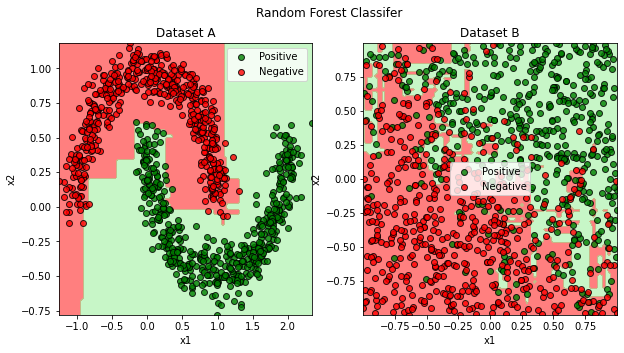

In [90]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

def plot_classifier(X_train,Y_train,axs,random_forest):
    x1=np.linspace(min(X_train[:,0]),max(X_train[:,0]),100)
    x2=np.linspace(min(X_train[:,1]),max(X_train[:,1]),100)
    X1,X2=np.meshgrid(x1,x2)
    labels=np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            labels[i][j]=eval_random_forest(random_forest,np.array([[x1[i],x2[j]]]))[0]
    #plt.figure(figsize=(8,8))
    axs.contourf(X1,X2,labels.T,levels=[-2,0,2],colors=['red','lightgreen'],alpha=0.5)
    axs.scatter(X_train[np.where(Y_train==1),0],X_train[np.where(Y_train==1),1],c='green',alpha=0.8,label='Positive',edgecolor='Black')
    axs.scatter(X_train[np.where(Y_train==-1),0],X_train[np.where(Y_train==-1),1],c='red',alpha=0.8,label='Negative',edgecolor='Black')

    axs.set_xlabel('x1')
    axs.set_ylabel('x2')
    
    axs.legend()
fig,axs=plt.subplots(1,2,figsize=(10,5))
for i in range(2):
    plot_classifier(X_trains[i],y_trains[i],axs[i],random_forest_accuracy[i])
    axs[i].set_title(f'{datasets[i]}')
plt.suptitle('Random Forest Classifer')


**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [33]:
# Codewrite cell
# Write code to run here (no plotting)
def evaluate(left_Y,right_Y,left_weight,right_weight):
    pl=np.sum(left_weight)/(np.sum(left_weight)+np.sum(right_weight))
    pr=1-pl
    if pl==0 :
        error_left=0
    else:
        ql_positive=np.sum(left_weight[np.where(np.sign(left_Y)==1)])/(np.sum(left_weight[np.where(np.sign(left_Y)==1)])+np.sum(left_weight[np.where(np.sign(left_Y)==-1)]))
        ql_negative=1-ql_positive
        ql=[ql_positive,ql_negative]
        error_left=1-max(ql)
        
    if pr==0:
        error_right=0
    else:
        qr_positive=np.sum(right_weight[np.where(np.sign(right_Y)==1)])/(np.sum(right_weight[np.where(np.sign(right_Y)==1)])+np.sum(right_weight[np.where(np.sign(right_Y)==-1)]))
        qr_negative=1-qr_positive
        qr=[qr_positive,qr_negative]
        error_right=1-max(qr)
        
    return pl*(error_left)+pr*(error_right)
    

def train_decision_tree_adaboost(X, Y,bins,depth,weight,curr_depth=0):
    """ Returns a decision tree trained on X and Y. 
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    """bins=np.zeros((X.shape[1],100))
    for i in range(X.shape[1]):
        bins[i]=np.linspace(np.min(X[:,i]),np.max(X[:,i]),100)"""
    emin=10
    if  abs(sum(Y))==Y.shape[0] or curr_depth==depth:
        return np.sign(sum(Y))
    for i in range(X.shape[1]):
        for j in range(len(bins[i])):
            left_X=X[np.where(X[:,i]<bins[i][j])]
            left_Y=Y[np.where(X[:,i]<bins[i][j])]
            left_weight=weight[np.where(X[:,i]<bins[i][j])]
            right_X=X[np.where(X[:,i]>=bins[i][j])]
            right_Y=Y[np.where(X[:,i]>=bins[i][j])]
            right_weight=weight[np.where(X[:,i]>=bins[i][j])]
            e=evaluate(left_Y,right_Y,left_weight,right_weight)
            if e<emin:
                emin=e
                best_left_X=left_X
                best_left_Y=left_Y
                best_left_weight=left_weight
                best_right_X=right_X
                best_right_Y=right_Y
                best_right_weight=right_weight
                best_dim=[i,j]
                best_split=bins[i][j]
    if best_dim==[0,0]:
        i=np.random.randint(0,X.shape[1])
        j=np.random.randint(0,len(bins[i]))
        best_left_X=X[np.where(X[:,i]<bins[i][j])]
        best_left_Y=Y[np.where(X[:,i]<bins[i][j])]
        best_left_weight=weight[np.where(X[:,i]<bins[i][j])]
        best_right_X=X[np.where(X[:,i]>=bins[i][j])]
        best_right_Y=Y[np.where(X[:,i]>=bins[i][j])]
        best_right_weight=weight[np.where(X[:,i]>=bins[i][j])]
        best_dim=[i,j]
        best_split=bins[i][j]

    bins_left=bins+[]
    bins_right=bins+[]
    bins_left[best_dim[0]]=bins_left[best_dim[0]][0:best_dim[1]]
    bins_right[best_dim[0]]=bins_right[best_dim[0]][best_dim[1]:]
    #left_tree=
    #right_tree=
    return {(best_dim[0],best_split):[train_decision_tree_adaboost(best_left_X,best_left_Y,bins_left,depth,best_left_weight,curr_depth+1),train_decision_tree_adaboost(best_right_X,best_right_Y,bins_right,depth,best_right_weight,curr_depth+1)]}

def eval_decision_tree_adaboost(weak_tree, test_X):
    """ Takes in a weak tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    if type(weak_tree)!=dict:
            return weak_tree*np.ones(test_X.shape[0])
    
    def solve(weak_tree,x):
        while type(weak_tree)==dict:
            curr_root_node=list(list(weak_tree.keys())[0])
            if x[curr_root_node[0]]>=curr_root_node[1]:
                weak_tree=weak_tree[list(weak_tree.keys())[0]][1]
            else:
                weak_tree=weak_tree[list(weak_tree.keys())[0]][0]   
        
        return weak_tree
    
    test_Y=np.zeros(test_X.shape[0])
    for i in range(test_X.shape[0]):
        test_Y[i]=solve(weak_tree,test_X[i])
    return test_Y

def adaboost_train(X_train,y_train,bins,depth):

    #weight=np.ones(X_train.shape[0])
    beta=[]
    weak_trees=[]
    weight=np.ones(y_train.shape[0])
    for i in range(50):
        weak_tree=train_decision_tree_adaboost(X_train,y_train,bins,depth,weight)
        y_pred_train=eval_decision_tree_adaboost(weak_tree, X_train)
        gamma_temp=0.5-np.sum(np.array([weight[i]*(abs(y_pred_train[i]-(y_train[i]))) for i in range(y_train.shape[0])]))/(2*np.sum(y_train.shape[0]))
        beta.append((1+gamma_temp)/(1-gamma_temp))
        indices=np.where(y_train!=y_pred_train)
        weight[indices]*=beta[i]
        weak_trees.append(weak_tree)
    #y_train=np.sign(y_train)
    
    return weak_trees,beta

def adaboost_test(weak_trees,beta,test_X):
    results=[eval_decision_tree_adaboost(weak_trees[i], test_X)*np.log(beta[i]) for i in range(len(weak_trees))]
    #test_Y=np.sign(np.sum(results,axis=0))
    return results

def make_bins(X_train):
    bins=[]
    for i in range(X_train.shape[1]):
        bins.append(np.linspace(np.min(X_train[:,i]),np.max(X_train[:,i]),250).tolist())
    return bins

        








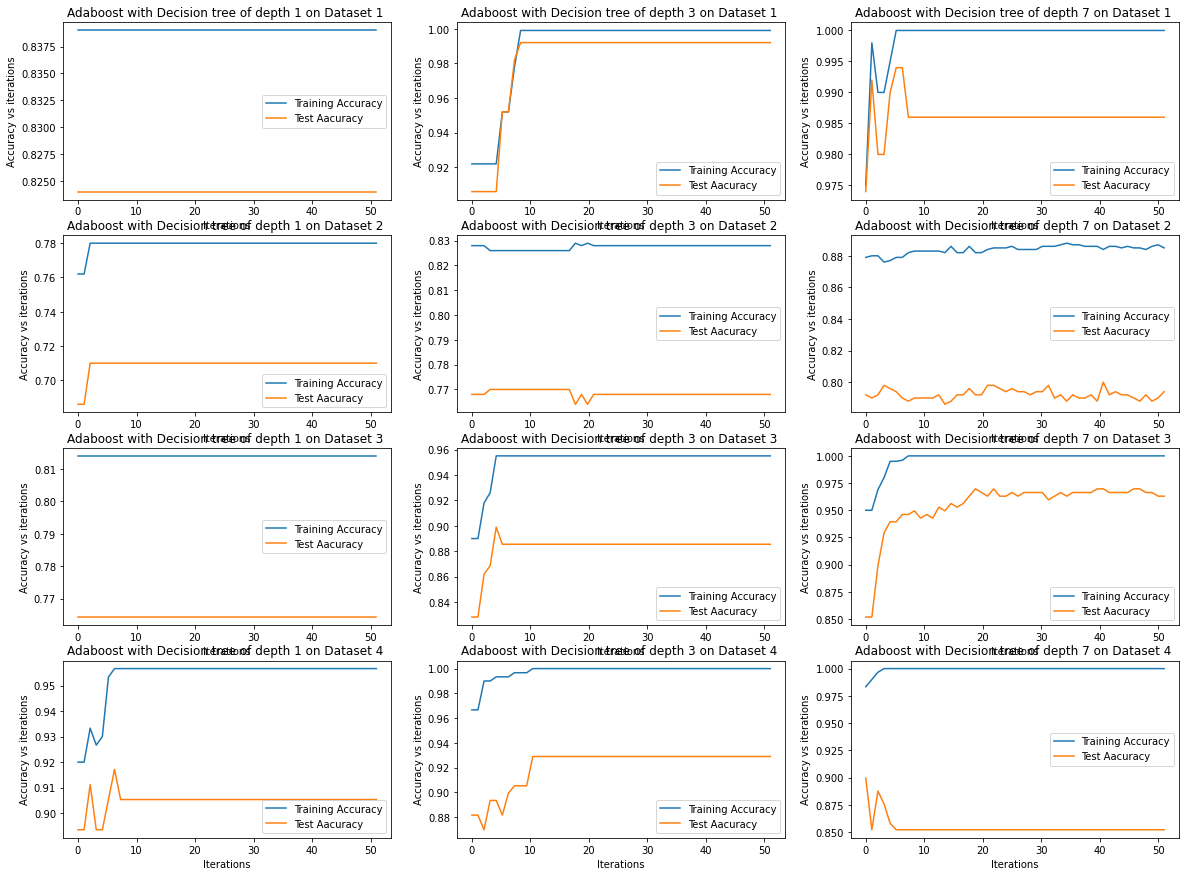

In [39]:
# Codewrite cell 
# Plots for iteration vs error here

set_a=np.load('Data/dataset_A.npz')
set_b=np.load('Data/dataset_B.npz')
set_c=np.load('Data/dataset_C.npz')
set_d=np.load('Data/dataset_D.npz')

X_train_a=set_a.get('arr_0')[0:1000,:]
y_train_a=set_a.get('arr_1')[0:1000]
X_val_a=set_a.get('arr_0')[1000:]
y_val_a=set_a.get('arr_1')[1000:]
X_test_a=set_a.get('arr_2')
y_test_a=set_a.get('arr_3')

X_train_b=set_b.get('arr_0')[0:1000]
y_train_b=set_b.get('arr_1')[0:1000]
X_val_b=set_b.get('arr_0')[1000:]
y_val_b=set_b.get('arr_1')[1000:]
X_test_b=set_b.get('arr_2')
y_test_b=set_b.get('arr_3')

X_train_c=set_c.get('arr_0')[0:1000]
y_train_c=set_c.get('arr_1')[0:1000]
X_val_c=set_c.get('arr_0')[1000:]
y_val_c=set_c.get('arr_1')[1000:]
X_test_c=set_c.get('arr_2')
y_test_c=set_c.get('arr_3')

X_train_d=set_d.get('arr_0')[:300]
X_val_d=set_d.get('arr_0')[300:]
y_val_d=set_d.get('arr_1')[300:]
y_train_d=set_d.get('arr_1')[0:300]
X_test_d=set_d.get('arr_2')
y_test_d=set_d.get('arr_3')

datasets=['Dataset A','Dataset B','Dataset C','Dataset D']

X_trains=[X_train_a,X_train_b,X_train_c,X_train_d]
y_trains=[y_train_a,y_train_b,y_train_c,y_train_d]
X_vals=[X_val_a,X_val_b,X_val_c,X_val_d]
y_vals=[y_val_a,y_val_b,y_val_c,y_val_d]
X_tests=[X_test_a,X_test_b,X_test_c,X_test_d]
y_tests=[y_test_a,y_test_b,y_test_c,y_test_d]
depth=[1,3,7]
fig,axs=plt.subplots(4,3,figsize=(20,15))
datasets=['Dataset A','Dataset B','Dataset C','Dataset D']
for i in range(4):
    bins=make_bins(X_trains[i])
    for j in range(3):
        weak_trees,beta=adaboost_train(X_trains[i],y_trains[i],bins,depth[j])
        y_trains[i]=np.sign(y_trains[i])
        results_train=adaboost_test(weak_trees,beta,X_trains[i])
        results_test=adaboost_test(weak_trees,beta,X_tests[i])
        accuracy_train=[]
        accuracy_test=[]
        for k in range(50):
            y_pred_train=np.sign(np.sum(results_train[:k+1],axis=0))
            y_pred_test=np.sign(np.sum(results_test[:k+1],axis=0))
            error_train=0.5*sum(abs(y_pred_train-y_trains[i]))/(y_trains[i].shape[0])
            error_test=0.5*sum(abs(y_pred_test-y_tests[i]))/(y_tests[i].shape[0])
            accuracy_train.append(1-error_train)
            accuracy_test.append(1-error_test)
        axs[i][j].plot(np.linspace(0,51,50),accuracy_train,np.linspace(0,51,50),accuracy_test)
        axs[i][j].set_xlabel('Iterations')
        axs[i][j].set_ylabel('Accuracy vs iterations')
        axs[i][j].legend(['Training Accuracy','Test Aacuracy'])
        axs[i][j].set_title(f'Adaboost with Decision tree of depth {depth[j]} on Dataset {i+1} ')
plt.show()

#plt.sca(axs[0][0])

            



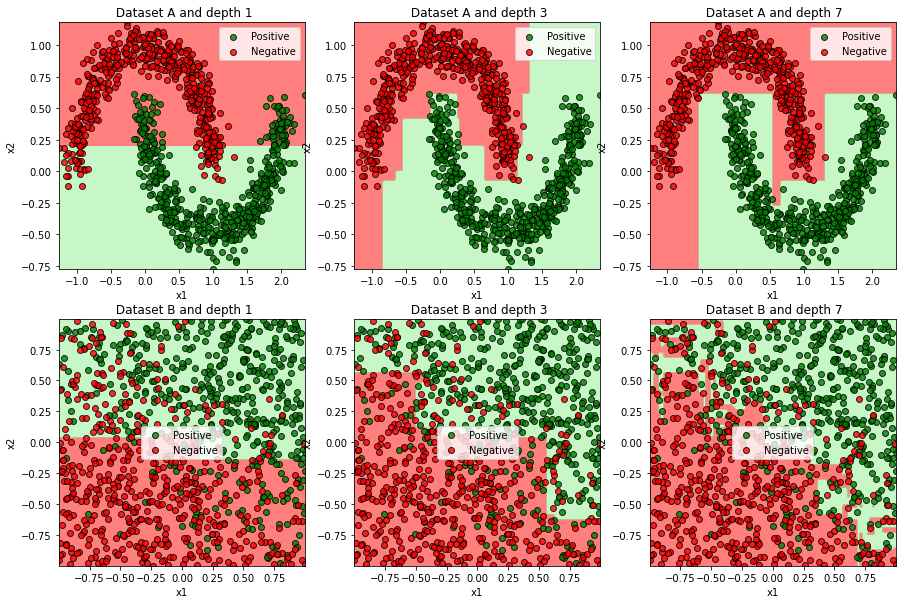

In [35]:
# Codewrite cell 
# Plots for illustrating the classifier here
def plot_classifier_adaboost(X_train,Y_train,depth,axs):
    x1=np.linspace(min(X_train[:,0]),max(X_train[:,0]),100)
    x2=np.linspace(min(X_train[:,1]),max(X_train[:,1]),100)
    bins=make_bins(X_train)
    X1,X2=np.meshgrid(x1,x2)
    labels=np.zeros((100,100))
    weak_trees,beta=adaboost_train(X_train,Y_train,bins,depth)
    #Y_train=np.sign(Y_train)
    for i in range(100):
        for j in range(100):
            results=adaboost_test(weak_trees,beta,np.array([x1[i],x2[j]]).reshape((1,2)))
            labels[i][j]=np.sign(np.sum(results,axis=0))[0]
    #plt.figure(figsize=(8,8))
    axs.contourf(X1,X2,labels.T,levels=[-2,0,2],colors=['red','lightgreen'],alpha=0.5)
    axs.scatter(X_train[np.where(Y_train==1),0],X_train[np.where(Y_train==1),1],c='green',alpha=0.8,label='Positive',edgecolor='Black')
    axs.scatter(X_train[np.where(Y_train==-1),0],X_train[np.where(Y_train==-1),1],c='red',alpha=0.8,label='Negative',edgecolor='Black')
    axs.set_xlabel('x1')
    axs.set_ylabel('x2')
    axs.legend()

fig,axs=plt.subplots(2,3,figsize=(15,10))
datasets=['Dataset A','Dataset B']
depths=[1,3,7]

set_a=np.load('dataset_A.npz')
set_b=np.load('dataset_B.npz')

X_train_a=set_a.get('arr_0')[0:1000,:]
y_train_a=set_a.get('arr_1')[0:1000]

X_train_b=set_b.get('arr_0')[0:1000]
y_train_b=set_b.get('arr_1')[0:1000]


X_trains=[X_train_a,X_train_b]
y_trains=[y_train_a,y_train_b]

for i in range(2):
    for j in range(3):
        plot_classifier_adaboost(X_trains[i],y_trains[i],depths[j],axs[i][j])
        axs[i][j].set_title(f' {datasets[i]} and depth {depths[j]}')





Textwrite cell:

1. Both the training and testing accuracy increase with increase the depth of the individual weak classifiers.

2. The overall classification accuracy is higher in dataset A than dataset B as there is a clearer notion of separability in dataset A over B.

3. In most cases, it is observed that the accuracy becomes constant within a few iterations, indicating that the contribution from  weaker learners coming in later iterations are zero.

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set. 

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional). 




In [3]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs
    
    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
print (projection_oracle_l1(w=np.array([0.55,0.95]), l1_norm=1))

#print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

[0.3 0.7]


In [5]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need 
# like evaluating the mean squared error or the gradient w.r.t. w
#Loading the .npz file containing data
parameters=np.load('Data/LassoReg_data.npz')
X=parameters.get('arr_0')
X_train=X[:60]
X_val=X[60:90]
X_test=X[90:]
y=parameters.get('arr_1')
y_train=y[:60]
y_val=y[60:90]
y_test=y[90:]
def mse(y,y_hat):
    return sum(np.square(y-y_hat))/y.shape[0]
def grad(X,W,y):
    return np.matmul(X.T,np.matmul(X,W)-y)


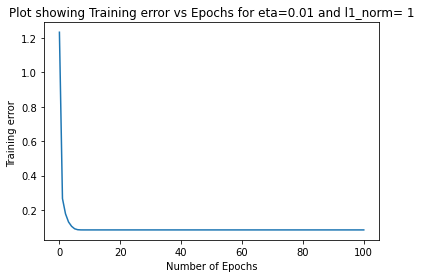

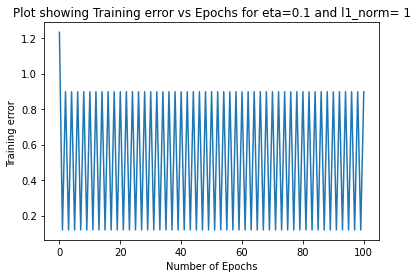

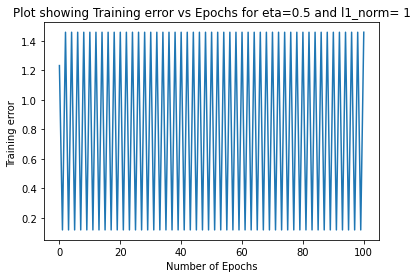

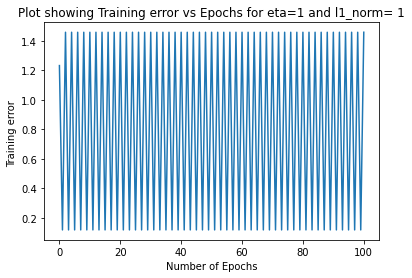

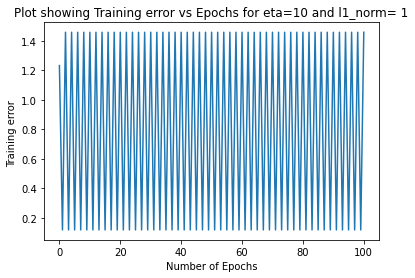

Best Performance on training data is obtained with eta= 0.01
Mean Squared error for l1_norm constraint=0.01 is 0.09002337260397443
Mean Squared error for l1_norm constraint=0.5 is 0.09002337260397443
Mean Squared error for l1_norm constraint=1 is 0.09002337260397443
Mean Squared error for l1_norm constraint=10 is 0.09002337260397443
Mean Squared error for l1_norm constraint=100 is 0.09002337260397443
Best Performance on validation data is obtained with l1_norm constraint radius= 0.01
Test error:0.10452093793253919
The top 10 weight values are:[0.8616313780201028, 0.13836861535705602, 6.622841275394364e-09, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 

'w=do_grad_descent(X_train,y_train)\n\nsum(w)'

In [26]:
# codewrite cell:

# Write the code for the gradient descent routine on the training set mean square error loss function.
# Also write code for doing validation of the learned model using the validation set

l1_norm=0.8
eta=1
def do_grad_descent(X,y,eta,l1_norm):
    epochs=100
    error=np.zeros(epochs+1)
    w=np.zeros(X.shape[1])
    error[0]=mse(y,np.matmul(X,w))
    for i in range(epochs):
        w_temp=w-eta*grad(X,w,y)
        w=projection_oracle_l1(w=w_temp,l1_norm=l1_norm)
        error[i+1]=mse(y,np.matmul(X,w))
    return w,error
etas=[0.01,0.1,0.5,1,10]
l1_norms=[0.01,0.5,1,10,100]
etabest=100
ebest=100
for eta in etas:
    w,error=do_grad_descent(X_train,y_train,eta,l1_norm=1)  
    if error[-1]<ebest:
        etabest=eta
        ebest=error[-1]
    plt.plot([i for i in range(101)],error)  
    plt.xlabel('Number of Epochs')
    plt.ylabel('Training error ')
    plt.title(f'Plot showing Training error vs Epochs for eta={eta} and l1_norm= 1')
    plt.show()
print(f'Best Performance on training data is obtained with eta= {etabest}')
# Now training on different l1_norm constraints and picking the one that works best on validation set 
ebest=100
for l1_norm in l1_norms:
    w,error=do_grad_descent(X_train,y_train,etabest,l1_norm=1) 
    y_hat_val=np.matmul(X_val,w)
    print(f'Mean Squared error for l1_norm constraint={l1_norm} is {mse(y_val,y_hat_val)}')
    if mse(y_val,y_hat_val)<ebest:
        l1_best=l1_norm
        ebest=mse(y_val,y_hat_val)
        wbest=w
print(f'Best Performance on validation data is obtained with l1_norm constraint radius= {l1_best}')

print(f'Test error:{mse(y_test,np.matmul(X_test,wbest))}')
max_w=(list(wbest))+[]
max_w.sort(reverse=True)
indices=[]
for i in range(10):

    for j in range(1000):
        if max_w[i]==wbest[j]:
            indices.append(j)
            break

print(f'The top 10 weight values are:{max_w[0:10]} ')
print(f'The corresponding indices are: {indices}')


"""w=do_grad_descent(X_train,y_train)

sum(w)"""


# Textwrite cell:
    Test error:0.10452093793253919
    The top 10 weight values are:[0.8616313780201028, 0.13836861535705602, 6.622841275394364e-09, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0] 
    The corresponding indices are: [107, 390, 355, 0, 0, 0, 0, 0, 0, 0]